<a href="https://colab.research.google.com/github/wnich/Coursera_Capstone/blob/master/final_capstone_tokyo_neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Battle of Neighborhoods

###       1.1 Background

   Looking at global tourism trends before the international travel entry restrictions due to the Covid-19 paramedic, tourism in Japan is on a rise, especially Tokyo. Tokyo is the largest metropolitan in the world. It is one of the most visited tourism destinations as it offers many unique experiences.Tokyo is a metropolitan prefecture comprising administrative entities of special wards and municipalities. Almost three-quarters of the population of Tokyo live in the eastern part of Tokyo in what are referred to as the 23 special wards. So, they are considered as the core and the most populous part of Tokyo.Each ward has a distinct character of its own for tourists and travelers to explore.



###       1.2 Business Problem

   As many tourists travel to experience the different culture, different traditions, and gastronomy. It is difficult for tourists to make choices among many options on travel essentials because everyone has their own preferences of where to go and it is all so fragmented that one has to assemble it themselves, especially if one is interested in local/non-touristy recommendations.

   Thus, leveraging Foursquare data and machine learning to build a recommendation and segmentation by applying Foursquare API location data, regional clustering of venue information would help to develop a personalized travel planning system to provide users with a travel schedule planning service and to determine what might be the ‘best’ areas for different activities ranging from accommodations, attractions, restaurants, parks and more, in order to ensure that they would have the best promising experience during their stays in Tokyo.

###       1.3 Target Audiance


- Ministry of Tourism or travel agency who wants to provide travel guidance for tourists to find the best locations based on their interests.
- Travelers who make their own plan for vacation. This can help them make an informed decision of where to go by providing an in-depth analysis of the wards and districts.
- Business Analyst or Data Scientist, who desires to analyze the areas of Tokyo using python, Jupyter notebook and machine learning techniques.

###       2. Data Requirements

An area that will be analyzed in this project: Tokyo’s special wards.

**Factors that will influence the decision:**
- Top 4 attractions in Tokyo
- Top 10 most common venues of the tourism areas


**Data Sources:**
- **Tokyo wards and major districts:** https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards 
        Web Scraping - extract Tokyo major districts and wards table from Wikipedia.


- **Tokyo’s top 4 attractions:** https://www.google.com/travel/things-to-do?g2lb=2502548%2C2503771%2C2503780%2C4258168%2C4270442%2C4306835%2C4317915%2C4371334%2C4401769%2C4419364%2C4482438%2C4486153%2C4492925%2C4509341%2C4524133%2C4530346%2C4533882%2C4536454%2C4540818%2C4552011%2C4554490%2C4270859%2C4284970%2C4291517&hl=th-US&gl=us&ssta=1&dest_mid=%2Fg%2F12lnhn10f&dest_state_type=main&dest_src=ts&sa=X&ved=2ahUKEwiMrcqDisbwAhXQi54KHVmnBQUQuL0BMAJ6BAgREDg#ttdm=35.640149_139.792202_11&ttdmf=%252Fm%252F07thkr

- **Geospatial data of the districts, wards and attractions via Geocoders**
- **Foursquare APIs:** finding all popular venues in the wards of the top attractions


## 3. METHODOLOGY

Before we get the data and start exploring it, let's import all required libraries...

In [ ]:
! pip install jupyter-conda

     |████████████████████████████████| 61kB 15.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 11.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/3e/89/7ea760b4daa42653ece2380531c90f64788d979110a2ab51049d92f408af/packaging-20.9-py2.py3-none-any.whl
  ERROR: Could not find a version that satisfies the requirement nb-conda-kernels>=2.2.0 (from jupyter-conda) (from versions: none)
ERROR: No matching distribution found for nb-conda-kernels>=2.2.0 (from jupyter-conda)


In [ ]:
! pip3 install lxml

     |████████████████████████████████| 6.8 MB 19.4 MB/s eta 0:00:01


In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
! pip install BeautifulSoup4
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install git+git://github.com/geopandas/geopandas.git
import geopandas as gpd
!pip install geoplot
import geoplot as gplt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

#  libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

import seaborn as sns
from matplotlib import pyplot as plt


print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 19.7MB/s eta 0:00:01
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-o4oqjc_p
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-o4oqjc_p
     |████████████████████████████████| 1.0MB 20.4MB/s eta 0:00:01
     |████████████████████████████████| 15.4MB 53.8MB/s eta 0:00:01
     |████████████████████████████████| 6.5MB 37.1MB/s eta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-3sv95qge/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
     |████████████████████████████████| 12.1MB 7.1MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 307kB 19.5MB/s eta 0:00:01
     |█████████

### Data Preparation

#### - Web Scraping

Use pandas to transform the data in the table on the Wikipedia page into a dataframe.


In [ ]:
url = "https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards"

In [ ]:
source = requests.get(url).text
soup = BeautifulSoup(source, 'html5lib')

#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>


In [ ]:
# we can see how many tables were found by checking the length of the tables list
len(tables)

10

In [ ]:
#print(tables[index].prettify())

Scrape data from HTML table into a DataFrame using BeautifulSoup and read_html

In [ ]:
tokyo_data = pd.read_html(str(tables[3]), flavor='bs4')

In [ ]:
tokyo_data

[        No.     Flag        Name    Kanji  Population(as of October 2016)  \
 0        01      NaN     Chiyoda     千代田区                           59441   
 1        02      NaN        Chūō      中央区                          147620   
 2        03      NaN      Minato       港区                          248071   
 3        04      NaN    Shinjuku      新宿区                          339211   
 4        05      NaN      Bunkyō      文京区                          223389   
 5        06      NaN       Taitō      台東区                          200486   
 6        07      NaN      Sumida      墨田区                          260358   
 7        08      NaN        Kōtō      江東区                          502579   
 8        09      NaN   Shinagawa      品川区                          392492   
 9        10      NaN      Meguro      目黒区                          280283   
 10       11      NaN         Ōta      大田区                          722608   
 11       12      NaN    Setagaya     世田谷区                      

In [ ]:
#Create a dataframe with table

tokyo_wards = tokyo_data[0] #pd.read_html(str(tables[3]), flavor='bs4')[0]

tokyo_wards = tokyo_wards.rename(columns = {tokyo_wards.columns[2] : 'Ward', tokyo_wards.columns[-2] : 'Area', tokyo_wards.columns[-3] : 'Density', tokyo_wards.columns[-4] : 'Population'} )

tokyo_wards#.tail()

No.     Flag        Ward    Kanji  Population  Density    Area  \
0        01      NaN     Chiyoda     千代田区       59441     5100   11.66   
1        02      NaN        Chūō      中央区      147620    14460   10.21   
2        03      NaN      Minato       港区      248071    12180   20.37   
3        04      NaN    Shinjuku      新宿区      339211    18620   18.22   
4        05      NaN      Bunkyō      文京区      223389    19790   11.29   
5        06      NaN       Taitō      台東区      200486    19830   10.11   
6        07      NaN      Sumida      墨田区      260358    18910   13.77   
7        08      NaN        Kōtō      江東区      502579    12510   40.16   
8        09      NaN   Shinagawa      品川区      392492    17180   22.84   
9        10      NaN      Meguro      目黒区      280283    19110   14.67   
10       11      NaN         Ōta      大田区      722608    11910   60.66   
11       12      NaN    Setagaya     世田谷区      910868    15690   58.05   
12       13      NaN     Shibuya      渋谷区      227850    15080   15.11   
13       14      NaN      Nakano      中野区      332902    21350   15.59   
14       15      NaN    Suginami      杉並区      570483    16750   34.06   
15       16      NaN     Toshima      豊島区      294673    22650   13.01   
16       17      NaN        Kita       北区      345063    16740   20.61   
17       18      NaN     Arakawa      荒川区      213648    21030   10.16   
18       19      NaN    Itabashi      板橋区      569225    17670   32.22   
19       20      NaN      Nerima      練馬区      726748    15120   48.08   
20       21      NaN      Adachi      足立区      674067    12660   53.25   
21       22      NaN  Katsushika      葛飾区      447140    12850   34.80   
22       23      NaN     Edogawa     江戸川区      685899    13750   49.90   
23  Overall  Overall     Overall  Overall     9375104    15146  619.00   

                                      Major districts  
0   Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...  
1   Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...  
2   Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...  
3   Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...  
4                               Hongō, Yayoi, Hakusan  
5                                       Ueno, Asakusa  
6                       Kinshichō, Morishita, Ryōgoku  
7   Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...  
8   Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...  
9      Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai  
10                Ōmori, Kamata, Haneda, Den-en-chōfu  
11        Shimokitazawa, Kinuta, Karasuyama, Tamagawa  
12        Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo  
13                                             Nakano  
14                           Kōenji, Asagaya, Ogikubo  
15               Ikebukuro, Komagome, Senkawa, Sugamo  
16                               Akabane, Ōji, Tabata  
17             Arakawa, Machiya, Nippori, Minamisenju  
18                           Itabashi, Takashimadaira  
19                        Nerima, Ōizumi, Hikarigaoka  
20                      Ayase, Kitasenju, Takenotsuka  
21                 Tateishi, Aoto, Kameari, Shibamata  
22                                       Kasai, Koiwa  
23                                                NaN

In [ ]:
#Drop unused columns and the last row
tokyo_wards_data = tokyo_wards.drop(['No.', 'Flag'], axis=1)
tokyo_wards_data.drop([23], inplace=True) 

In [ ]:
tokyo_wards_data

Ward Kanji  Population  Density   Area  \
0      Chiyoda  千代田区       59441     5100  11.66   
1         Chūō   中央区      147620    14460  10.21   
2       Minato    港区      248071    12180  20.37   
3     Shinjuku   新宿区      339211    18620  18.22   
4       Bunkyō   文京区      223389    19790  11.29   
5        Taitō   台東区      200486    19830  10.11   
6       Sumida   墨田区      260358    18910  13.77   
7         Kōtō   江東区      502579    12510  40.16   
8    Shinagawa   品川区      392492    17180  22.84   
9       Meguro   目黒区      280283    19110  14.67   
10         Ōta   大田区      722608    11910  60.66   
11    Setagaya  世田谷区      910868    15690  58.05   
12     Shibuya   渋谷区      227850    15080  15.11   
13      Nakano   中野区      332902    21350  15.59   
14    Suginami   杉並区      570483    16750  34.06   
15     Toshima   豊島区      294673    22650  13.01   
16        Kita    北区      345063    16740  20.61   
17     Arakawa   荒川区      213648    21030  10.16   
18    Itabashi   板橋区      569225    17670  32.22   
19      Nerima   練馬区      726748    15120  48.08   
20      Adachi   足立区      674067    12660  53.25   
21  Katsushika   葛飾区      447140    12850  34.80   
22     Edogawa  江戸川区      685899    13750  49.90   

                                      Major districts  
0   Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...  
1   Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...  
2   Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...  
3   Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...  
4                               Hongō, Yayoi, Hakusan  
5                                       Ueno, Asakusa  
6                       Kinshichō, Morishita, Ryōgoku  
7   Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...  
8   Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...  
9      Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai  
10                Ōmori, Kamata, Haneda, Den-en-chōfu  
11        Shimokitazawa, Kinuta, Karasuyama, Tamagawa  
12        Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo  
13                                             Nakano  
14                           Kōenji, Asagaya, Ogikubo  
15               Ikebukuro, Komagome, Senkawa, Sugamo  
16                               Akabane, Ōji, Tabata  
17             Arakawa, Machiya, Nippori, Minamisenju  
18                           Itabashi, Takashimadaira  
19                        Nerima, Ōizumi, Hikarigaoka  
20                      Ayase, Kitasenju, Takenotsuka  
21                 Tateishi, Aoto, Kameari, Shibamata  
22                                       Kasai, Koiwa

#### - Add Geospatial Data
Get the coordinates of 23 special wards using GeoCoder

In [ ]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="Tokyo_explorer")

tokyo_wards_data['Major_Dist_Coord']= tokyo_wards_data['Ward'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
tokyo_wards_data[['Latitude', 'Longitude']] = tokyo_wards_data['Major_Dist_Coord'].apply(pd.Series)

tokyo_wards_data.drop(['Major_Dist_Coord'], axis=1, inplace=True)
tokyo_wards_data

Ward Kanji  Population  Density   Area  \
0      Chiyoda  千代田区       59441     5100  11.66   
1         Chūō   中央区      147620    14460  10.21   
2       Minato    港区      248071    12180  20.37   
3     Shinjuku   新宿区      339211    18620  18.22   
4       Bunkyō   文京区      223389    19790  11.29   
5        Taitō   台東区      200486    19830  10.11   
6       Sumida   墨田区      260358    18910  13.77   
7         Kōtō   江東区      502579    12510  40.16   
8    Shinagawa   品川区      392492    17180  22.84   
9       Meguro   目黒区      280283    19110  14.67   
10         Ōta   大田区      722608    11910  60.66   
11    Setagaya  世田谷区      910868    15690  58.05   
12     Shibuya   渋谷区      227850    15080  15.11   
13      Nakano   中野区      332902    21350  15.59   
14    Suginami   杉並区      570483    16750  34.06   
15     Toshima   豊島区      294673    22650  13.01   
16        Kita    北区      345063    16740  20.61   
17     Arakawa   荒川区      213648    21030  10.16   
18    Itabashi   板橋区      569225    17670  32.22   
19      Nerima   練馬区      726748    15120  48.08   
20      Adachi   足立区      674067    12660  53.25   
21  Katsushika   葛飾区      447140    12850  34.80   
22     Edogawa  江戸川区      685899    13750  49.90   

                                      Major districts   Latitude   Longitude  
0   Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...  35.693810  139.753216  
1   Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...  35.666255  139.775565  
2   Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...  35.643227  139.740055  
3   Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...  35.693763  139.703632  
4                               Hongō, Yayoi, Hakusan  35.718810  139.744732  
5                                       Ueno, Asakusa  35.717450  139.790859  
6                       Kinshichō, Morishita, Ryōgoku  35.700429  139.805017  
7   Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...  35.649154  139.812790  
8   Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...  35.599252  139.738910  
9      Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai  35.621250  139.688014  
10                Ōmori, Kamata, Haneda, Den-en-chōfu  35.561206  139.715843  
11        Shimokitazawa, Kinuta, Karasuyama, Tamagawa  35.646096  139.656270  
12        Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo  35.664596  139.698711  
13                                             Nakano  35.718123  139.664468  
14                           Kōenji, Asagaya, Ogikubo  35.699493  139.636288  
15               Ikebukuro, Komagome, Senkawa, Sugamo  35.736156  139.714222  
16                               Akabane, Ōji, Tabata  -0.220164  -78.512327  
17             Arakawa, Machiya, Nippori, Minamisenju  35.737529  139.781310  
18                           Itabashi, Takashimadaira  35.774143  139.681209  
19                        Nerima, Ōizumi, Hikarigaoka  35.748360  139.638735  
20                      Ayase, Kitasenju, Takenotsuka  35.783703  139.795319  
21                 Tateishi, Aoto, Kameari, Shibamata  35.751733  139.863816  
22                                       Kasai, Koiwa  35.678278  139.871091

Split the "Major Districts" column and rename the column to "District"

In [ ]:
tokyo_wards_data_dist = tokyo_wards_data.drop('Major districts', axis=1).join(tokyo_wards_data['Major districts'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('District'))

tokyo_wards_data_dist.head()

Ward Kanji  Population  Density   Area  Latitude   Longitude  \
0  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   
0  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   
0  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   
0  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   
0  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   

        District  
0      Nagatachō  
0   Kasumigaseki  
0       Ōtemachi  
0     Marunouchi  
0      Akihabara

Get the coordinates of districts

In [ ]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="Tokyo_explorer")

tokyo_wards_data_dist['Major_Dist_Coord_']= tokyo_wards_data_dist['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
tokyo_wards_data_dist[['District Latitude', 'District Longitude']] = tokyo_wards_data_dist['Major_Dist_Coord_'].apply(pd.Series)

tokyo_wards_data_dist.drop(['Major_Dist_Coord_'], axis=1, inplace=True)
tokyo_wards_data_dist

Ward Kanji  Population  Density   Area   Latitude   Longitude  \
0      Chiyoda  千代田区       59441     5100  11.66  35.693810  139.753216   
0      Chiyoda  千代田区       59441     5100  11.66  35.693810  139.753216   
0      Chiyoda  千代田区       59441     5100  11.66  35.693810  139.753216   
0      Chiyoda  千代田区       59441     5100  11.66  35.693810  139.753216   
0      Chiyoda  千代田区       59441     5100  11.66  35.693810  139.753216   
..         ...   ...         ...      ...    ...        ...         ...   
21  Katsushika   葛飾区      447140    12850  34.80  35.751733  139.863816   
21  Katsushika   葛飾区      447140    12850  34.80  35.751733  139.863816   
21  Katsushika   葛飾区      447140    12850  34.80  35.751733  139.863816   
22     Edogawa  江戸川区      685899    13750  49.90  35.678278  139.871091   
22     Edogawa  江戸川区      685899    13750  49.90  35.678278  139.871091   

         District  District Latitude  District Longitude  
0       Nagatachō          35.675618          139.743469  
0    Kasumigaseki          35.674054          139.750972  
0        Ōtemachi          35.686788          139.766224  
0      Marunouchi          35.680656          139.765222  
0       Akihabara          35.701893          139.774368  
..            ...                ...                 ...  
21           Aoto          35.745574          139.856054  
21        Kameari          35.766665          139.847801  
21      Shibamata          35.756430          139.875181  
22          Kasai          -5.349800           21.424098  
22          Koiwa          35.733184          139.881900  

[106 rows x 10 columns]

In [ ]:
#save
# Export dataframe to csv, If later we want to start with a csv copy 
tokyo_wards_data_dist.to_csv('tokyo_wards_data_dist.csv',index=False)

In [ ]:
#read
tokyo_wards_data_dist = pd.read_csv('tokyo_wards_data_dist.csv')
tokyo_wards_data_dist.head(3)

Ward Kanji  Population  Density   Area  Latitude   Longitude  \
0  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   
1  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   
2  Chiyoda  千代田区       59441     5100  11.66  35.69381  139.753216   

        District  District Latitude  District Longitude  
0      Nagatachō          35.675618          139.743469  
1   Kasumigaseki          35.674054          139.750972  
2       Ōtemachi          35.686788          139.766224

#### - Get top 4 attractions in Tokyo

With the query, "Top attractions in tokyo", Google gives the first 4 places according to the quality rating.
 (https://www.google.com/travel/things-to-do?g2lb=2502548%2C2503771%2C2503780%2C4258168%2C4270442%2C4306835%2C4317915%2C4328159%2C4371334%2C4401769%2C4419364%2C4463666%2C4482438%2C4486153%2C4491350%2C4492925%2C4517257%2C4523593%2C4524133%2C4526388%2C4270859%2C4284970%2C4291517&hl=th-US&gl=us&ssta=1&dest_mid=%2Fg%2F12lnhn10f&dest_state_type=main&dest_src=ts&sa=X&ved=2ahUKEwjxiqPQqM_vAhUpIjQIHfIGAw4QuL0BMAJ6BAgIEDg#ttdm=35.640149_139.792202_11&ttdmf=%2525252Fm%2525252F03k987)

Create the data file to simplify with the first four places from Google, for simplicity:

In [ ]:
data = {'Attraction':  ['Sensō-ji Temple', 'Tokyo Skytree', 'Tokyo Tower', 'Meiji Shrine'],
        'Address': ['2-3-1 Asakusa, Taitō-ku, Tokyo', '1 Chome-1-2 Oshiage, Sumida City, Tokyo','4 Chome-2-8 Shibakoen, Minato City, Tokyo', '1-1 Yoyogikamizonocho, Shibuya City, Tokyo'],
        'Ward': ['Taitō', 'Sumida','Minato', 'Shibuya'],
        'District': ['Asakusa', 'Oshiage','Shibakoen','Shibuya' ]}


# df = pd.DataFrame (data, columns = ['Attraction','Address','District','Latitude of Attraction', 'Longitude of Attraction','Ward'])
df = pd.DataFrame (data, columns = ['Attraction','Address','District','Ward'])



In [ ]:
#Get lat and lng of the each attraction
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="Tokyo_explorer")

df['Major_Dist_Coord']= df['Attraction'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Attraction Latitude', 'Attraction Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

Attraction                                     Address   District  \
0  Sensō-ji Temple              2-3-1 Asakusa, Taitō-ku, Tokyo    Asakusa   
1    Tokyo Skytree     1 Chome-1-2 Oshiage, Sumida City, Tokyo    Oshiage   
2      Tokyo Tower   4 Chome-2-8 Shibakoen, Minato City, Tokyo  Shibakoen   
3     Meiji Shrine  1-1 Yoyogikamizonocho, Shibuya City, Tokyo    Shibuya   

      Ward  Attraction Latitude  Attraction Longitude  
0    Taitō            35.713402            139.795519  
1   Sumida            35.710054            139.810714  
2   Minato            35.658586            139.745440  
3  Shibuya            35.674842            139.699627

In [ ]:
#save
# Export dataframe to csv, If later we want to start with a csv copy for task 2
df.to_csv('tokyo_attractions.csv',index=False)

In [ ]:
df = pd.read_csv('tokyo_attractions.csv')
df

Attraction                                     Address   District  \
0  Sensō-ji Temple              2-3-1 Asakusa, Taitō-ku, Tokyo    Asakusa   
1    Tokyo Skytree     1 Chome-1-2 Oshiage, Sumida City, Tokyo    Oshiage   
2      Tokyo Tower   4 Chome-2-8 Shibakoen, Minato City, Tokyo  Shibakoen   
3     Meiji Shrine  1-1 Yoyogikamizonocho, Shibuya City, Tokyo    Shibuya   

      Ward  Attraction Latitude  Attraction Longitude  
0    Taitō            35.713402            139.795519  
1   Sumida            35.710054            139.810714  
2   Minato            35.658586            139.745440  
3  Shibuya            35.674842            139.699627

#### 

#### Let's visualize Tokyo

Firstly, get the geographical coordinates of Tokyo...



In [ ]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


In [ ]:
#Check data types:
df.dtypes

Attraction               object
Address                  object
District                 object
Ward                     object
Attraction Latitude     float64
Attraction Longitude    float64
dtype: object

In [ ]:
tokyo_wards_data_dist.dtypes

Ward                   object
Kanji                  object
Population              int64
Density                 int64
Area                  float64
Latitude              float64
Longitude             float64
District               object
District Latitude     float64
District Longitude    float64
dtype: object

Download countries geojson file

In [ ]:
!wget --quiet https://raw.githubusercontent.com/dataofjapan/land/master/tokyo.geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
bcn_geo = r'tokyo.geojson' # geojson file


The ward names in the geojson  file end with "Ku". While in Wikipedia table does not.
So, to merge geojson df (bcn_geo) with wikipedia table, I will use "Kanji" and "ward_ja" columns for merging, instead.

In [ ]:
from shapely.geometry import shape
import json

gdf = gpd.read_file(bcn_geo)
gdf = gdf.merge(tokyo_wards_data_dist, left_on="ward_ja", right_on="Kanji")
gdf = gdf.drop(columns=['ward_ja','ward_en','Kanji','area_ja','area_en','code','Population','Area','Latitude','Longitude'])

gdf

geometry     Ward  Density  \
0    POLYGON ((139.82105 35.81508, 139.82168 35.814...   Adachi    12660   
1    POLYGON ((139.82105 35.81508, 139.82168 35.814...   Adachi    12660   
2    POLYGON ((139.82105 35.81508, 139.82168 35.814...   Adachi    12660   
3    POLYGON ((139.76093 35.73221, 139.76100 35.732...   Bunkyō    19790   
4    POLYGON ((139.76093 35.73221, 139.76100 35.732...   Bunkyō    19790   
..                                                 ...      ...      ...   
101  MULTIPOLYGON (((139.69539 35.60749, 139.69563 ...      Ōta    11910   
102  POLYGON ((139.81449 35.73880, 139.81466 35.737...  Arakawa    21030   
103  POLYGON ((139.81449 35.73880, 139.81466 35.737...  Arakawa    21030   
104  POLYGON ((139.81449 35.73880, 139.81466 35.737...  Arakawa    21030   
105  POLYGON ((139.81449 35.73880, 139.81466 35.737...  Arakawa    21030   

          District  District Latitude  District Longitude  
0            Ayase          35.446047          139.430823  
1        Kitasenju          35.754036          139.804177  
2      Takenotsuka          35.794532          139.790712  
3            Hongō          35.175376          137.013476  
4            Yayoi          44.079308          143.552653  
..             ...                ...                 ...  
101   Den-en-chōfu          35.660036          139.554815  
102        Arakawa          35.737529          139.781310  
103        Machiya          35.742314          139.781413  
104        Nippori          35.728380          139.770982  
105    Minamisenju          35.736661          139.796677  

[106 rows x 6 columns]

In [ ]:
gdf.to_csv('gdf.csv',index=False)

In [ ]:
gdf = pd.read_csv('gdf.csv')


Visualize the population density of Tokyo's special wards

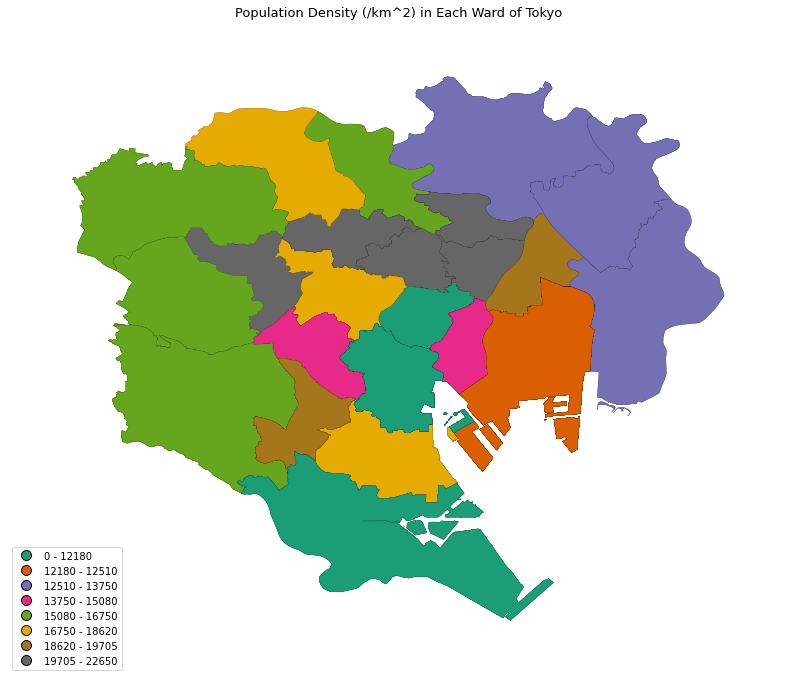

In [ ]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(gdf['Density'], k=8)

# Map
gplt.choropleth(gdf, 
    hue="Density", 
    linewidth=.1,
    scheme=scheme, cmap='Dark2',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Population Density (/km^2) in Each Ward of Tokyo', fontsize=13);

Now let's create a map of the major districts in 23 special wards using latitude and longitude values to check if they are correct locations...

In [ ]:
map_jp = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(gdf['District Latitude'], gdf['District Longitude'], gdf['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jp)  
    
map_jp

As seen, there are several misplaced geolocations that need to get fixed.

Before fixing the misplaced locations, we first join "df" with "tokyo_wards_data_dist" to select only districts in the wards where the top 4 attractions located

In [ ]:
df_tokyo = gdf.merge(df, on="Ward")
df_tokyo = df_tokyo.drop(columns=['Address','geometry','District_y', 'Attraction', 'Attraction Latitude','Attraction Longitude' ])
df_tokyo = df_tokyo.rename(columns={"District_x": "District"})
df_tokyo.reset_index()
df_tokyo

Ward  Density       District  District Latitude  District Longitude
0     Taitō    19830           Ueno          35.713376          139.776656
1     Taitō    19830        Asakusa          35.717597          139.797563
2   Shibuya    15080        Shibuya          35.664596          139.698711
3   Shibuya    15080          Ebisu          35.646438          139.710210
4   Shibuya    15080       Harajuku          35.668705          139.705336
5   Shibuya    15080     Daikanyama          35.648157          139.703293
6   Shibuya    15080          Hiroo          42.285532          143.311616
7    Sumida    18910      Kinshichō          35.696312          139.815043
8    Sumida    18910      Morishita          35.687998          139.797044
9    Sumida    18910        Ryōgoku          35.696854          139.797428
10   Minato    12180         Odaiba          35.619050          139.779364
11   Minato    12180      Shinbashi          35.665106          139.756116
12   Minato    12180   Hamamatsuchō          35.655111          139.757062
13   Minato    12180           Mita           3.500009          -73.000009
14   Minato    12180       Roppongi          35.662457          139.733498
15   Minato    12180      Toranomon          35.670187          139.750056
16   Minato    12180         Aoyama          37.898632          139.001079
17   Minato    12180          Azabu          35.656402          139.733970
18   Minato    12180        Akasaka          35.671679          139.735622

In [ ]:
map_jp_err = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_tokyo['District Latitude'], df_tokyo['District Longitude'], df_tokyo['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_jp_err)  
    
map_jp_err

In [ ]:
map_jp_err.save('visualize Err Loc Map.html')

According to the map above, there are coordinate values of 2 districts that are off.
This error can easily be found since there are chances that places around the world share the same name. 
So, it's easily mistaken

Let's fix...

**Districts**: Aoyama, Hiroo, Mita

According to the https://latitude.to/articles-by-country/jp/japan/34507/aoyama-minato-tokyo

The **Aoyama's** correct location: 35.6720 139.7230

The **Hiroo's** correct location: 35.6505 139.7173

The **Mita's** correct location: 35.6472 139.7409

In [ ]:
#Aoyama
df_tokyo.loc[df_tokyo['District'] == 'Aoyama']

Empty DataFrame
Columns: [Ward, Density, District, District Latitude, District Longitude]
Index: []

In [ ]:
#The district isn't found using above query...

#The district is found by having space
df_tokyo.loc[df_tokyo['District'] == ' Aoyama']


Ward  Density District  District Latitude  District Longitude
16  Minato    12180   Aoyama          37.898632          139.001079

In [ ]:
df_tokyo.iloc[16]


Ward                   Minato
Density                 12180
District               Aoyama
District Latitude     37.8986
District Longitude    139.001
Name: 16, dtype: object

In [ ]:
#Replace with the correct lat and lng values
df_tokyo.at[16,['District Latitude', 'District Longitude']]= [35.6720,139.7230]

In [ ]:
#check
df_tokyo.iloc[16]

Ward                   Minato
Density                 12180
District               Aoyama
District Latitude      35.672
District Longitude    139.723
Name: 16, dtype: object

In [ ]:
#Hiroo
df_tokyo.iloc[6]


Ward                  Shibuya
Density                 15080
District                Hiroo
District Latitude     42.2855
District Longitude    143.312
Name: 6, dtype: object

In [ ]:
#Replace with the correct lat and lng values
df_tokyo.at[6,['District Latitude', 'District Longitude']]= [35.6505,139.7173]

In [ ]:
#check
df_tokyo.iloc[6]

Ward                  Shibuya
Density                 15080
District                Hiroo
District Latitude     35.6505
District Longitude    139.717
Name: 6, dtype: object

In [ ]:
#Mita
df_tokyo.loc[df_tokyo['District'] == ' Mita']

Ward  Density District  District Latitude  District Longitude
13  Minato    12180     Mita           3.500009          -73.000009

In [ ]:
df_tokyo.at[13,['District Latitude', 'District Longitude']]= [35.6472,139.7409]
df_tokyo.iloc[13]


Ward                   Minato
Density                 12180
District                 Mita
District Latitude     35.6472
District Longitude    139.741
Name: 13, dtype: object

In [ ]:
gdf.astype({'District Latitude': 'int32', 'District Longitude': 'int32'}).dtypes

geometry              object
Ward                  object
Density                int64
District              object
District Latitude      int32
District Longitude     int32
dtype: object

In [ ]:
#save
# Export dataframe to csv, If later we want to start with a csv copy for task 2
df_tokyo.to_csv('df_tokyo.csv',index=False)

In [ ]:
df_tokyo = pd.read_csv('df_tokyo.csv')
df_tokyo

Ward  Density       District  District Latitude  District Longitude
0     Taitō    19830           Ueno          35.713376          139.776656
1     Taitō    19830        Asakusa          35.717597          139.797563
2   Shibuya    15080        Shibuya          35.664596          139.698711
3   Shibuya    15080          Ebisu          35.646438          139.710210
4   Shibuya    15080       Harajuku          35.668705          139.705336
5   Shibuya    15080     Daikanyama          35.648157          139.703293
6   Shibuya    15080          Hiroo          35.650500          139.717300
7    Sumida    18910      Kinshichō          35.696312          139.815043
8    Sumida    18910      Morishita          35.687998          139.797044
9    Sumida    18910        Ryōgoku          35.696854          139.797428
10   Minato    12180         Odaiba          35.619050          139.779364
11   Minato    12180      Shinbashi          35.665106          139.756116
12   Minato    12180   Hamamatsuchō          35.655111          139.757062
13   Minato    12180           Mita          35.647200          139.740900
14   Minato    12180       Roppongi          35.662457          139.733498
15   Minato    12180      Toranomon          35.670187          139.750056
16   Minato    12180         Aoyama          35.672000          139.723000
17   Minato    12180          Azabu          35.656402          139.733970
18   Minato    12180        Akasaka          35.671679          139.735622

In [ ]:
#Recheck
# create map of districts in Tokyo using latitude and longitude values, to check if they are correct 
map_jp_err_recheck = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_tokyo['District Latitude'], df_tokyo['District Longitude'], df_tokyo['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#b300fa',
        fill=True,
        fill_color='#b300fa',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jp_err_recheck)  
    
map_jp_err_recheck

In [ ]:
map_jp_err_recheck.save('visualize Recheck Map.html')

### 3. Methodology

Now we have all wards and districts of Tokyo, along with top 4 attractions. 

Now that I have the map with each of the postalcodes in it, using the FourSquare API (for more info go their main webpage: “Foursquare”) I will fetch all the shops, buildings surrounding those postcodes using the following code:

3.1. Business Understanding

The aim of this project is to find the best neighborhood of Milan to open a new restaurant.

3.2 Explore the districts and wards near the attractions

In [ ]:
CLIENT_ID = 'R3X02K1RQ43LXURRIDKKOE05Z1OOU531DTWXN2YYDGEKT5QB' # your Foursquare ID
CLIENT_SECRET = 'URUDLZJQNML4HHCDHF3A2GWAS2DR4QJAFXN2C12FNIJTZCFF' # your Foursquare Secret
ACCESS_TOKEN= '42UCQQVMZYZTOJUIHEHQYTKI1NUYE44RQ15A45XH3ZST31AS'
VERSION = '20180604'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

### --------------------

In [ ]:
#Function to apply it to every Postcode we have.
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['address'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Address',
                  'Venue distance',
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venue/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id, 
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

### ------

### We set attractions as centre. So we use lat & long of attractions to search for nearby venues

In [ ]:
Tokyo_venues = getNearbyVenues(names=df_tokyo['District'],
                                   latitudes=df_tokyo['District Latitude'],
                                   longitudes=df_tokyo['District Longitude'],
                                   radius=1500
                                  )

Ueno
 Asakusa
Shibuya
 Ebisu
 Harajuku
 Daikanyama
 Hiroo
Kinshichō
 Morishita
 Ryōgoku
Odaiba
 Shinbashi
 Hamamatsuchō
 Mita
 Roppongi
 Toranomon
 Aoyama
 Azabu
 Akasaka


In [ ]:
Tokyo_venues_csv = Tokyo_venues.merge(gdf[['District','Ward']], on='District')
Tokyo_venues_csv

District  District Latitude  District Longitude  \
0         Ueno          35.713376          139.776656   
1         Ueno          35.713376          139.776656   
2         Ueno          35.713376          139.776656   
3         Ueno          35.713376          139.776656   
4         Ueno          35.713376          139.776656   
...        ...                ...                 ...   
1895   Akasaka          35.671679          139.735622   
1896   Akasaka          35.671679          139.735622   
1897   Akasaka          35.671679          139.735622   
1898   Akasaka          35.671679          139.735622   
1899   Akasaka          35.671679          139.735622   

                                                  Venue  Venue Latitude  \
0       National Museum of Nature and Science (国立科学博物館)       35.715898   
1              National Museum of Western Art (国立西洋美術館)       35.715362   
2           Sauna & Capsule Hotel Hokuo (サウナ&カプセルホテル北欧)       35.712984   
3                         Afilia Sherry's (アフィリア・シェリーズ)       35.711089   
4                                         Okina-an (翁庵)       35.711879   
...                                                 ...             ...   
1895                      Fujifilm Square (フジフイルム スクエア)       35.665186   
1896  Japanese Garden - Hotel New Otani (ホテルニューオータニ ...       35.680127   
1897                                     Kayanoya (茅乃舎)       35.666379   
1898                             FREY's Famous Pizzeria       35.665262   
1899                                  Downstairs Coffee       35.666020   

      Venue Longitude    Address  Venue distance      Venue Category  \
0          139.776683   上野公園7-20             280      Science Museum   
1          139.775880    上野公園7-7             231          Art Museum   
2          139.777867   上野7-2-16             117  Sauna / Steam Room   
3          139.775196   上野6-13-8             286        Cocktail Bar   
4          139.778656  東上野3-39-8             245     Soba Restaurant   
...               ...        ...             ...                 ...   
1895       139.730439    赤坂9-7-3             861         Art Gallery   
1896       139.734391    紀尾井町4-1             947              Garden   
1897       139.730473    赤坂9-7-4             751        Gourmet Shop   
1898       139.732678  六本木4-5-15             762         Pizza Place   
1899       139.728217  六本木7-3-10             919                Café   

                      Venue ID    Ward  
0     4b612a56f964a520ae0b2ae3   Taitō  
1     4b556c34f964a520ece327e3   Taitō  
2     4f80f0bae4b0e160b9c9e122   Taitō  
3     4c7cc938247cb60cd2fa5e5e   Taitō  
4     4b81fa21f964a5203bc630e3   Taitō  
...                        ...     ...  
1895  4b289b08f964a520329424e3  Minato  
1896  4db9f0b67aba1fe0fb3edda2  Minato  
1897  4bab4328f964a5204c9c3ae3  Minato  
1898  4d9bef117ae5548188c14274  Minato  
1899  4e18310ffa761946458e7318  Minato  

[1900 rows x 11 columns]

In [ ]:
Tokyo_venues_csv.to_csv('Tokyo_venues_csv.csv',index=False)

In [ ]:
Tokyo_venues_csv = pd.read_csv('Tokyo_venues_csv.csv')

### The foursquare API can help me to find a lot of places 
### but if 2 centroids are too close together, it could extract duplicates venues

In [ ]:
Tokyo_venues_csv.duplicated('Venue ID').value_counts()

False    1400
True      500
dtype: int64

In [ ]:
#We will determine the distance from Ward location 
# dup = Tokyo_venues_csv[Tokyo_venues_csv.duplicated(subset = ['Venue ID'])]
#### Notice there are duplicated location...as seen below

Tokyo_venues_csv = Tokyo_venues_csv.sort_values(['Venue ID','Venue distance'] , ascending=[False, True])
Tokyo_venues_csv = Tokyo_venues_csv.drop_duplicates(subset='Venue ID', keep='first')
# len(Tokyo_venues_csv_unq)
Tokyo_venues_csv

District  District Latitude  District Longitude  \
1238   Hamamatsuchō          35.655111          139.757062   
958         Ryōgoku          35.696854          139.797428   
519      Daikanyama          35.648157          139.703293   
427        Harajuku          35.668705          139.705336   
1679         Aoyama          35.672000          139.723000   
...             ...                ...                 ...   
1121      Shinbashi          35.665106          139.756116   
392           Ebisu          35.646438          139.710210   
1224   Hamamatsuchō          35.655111          139.757062   
1849        Akasaka          35.671679          139.735622   
1521      Toranomon          35.670187          139.750056   

                                                  Venue  Venue Latitude  \
1238                                 Blue Bottle Coffee       35.655115   
958              APA Hotel & Resort (アパホテル&リゾート 両国駅タワー)       35.697346   
519             Human beings everybody noodles (人類みな麺類)       35.649007   
427     Sarutahiko Coffee The Bridge (猿田彦珈琲 The Bridge)       35.669955   
1679  Mitsui Garden Hotel Jingugaien Tokyo Premier (...       35.680017   
...                                                 ...             ...   
1121                             Conrad Tokyo (コンラッド東京)       35.662973   
392                      The Westin Tokyo (ウェスティンホテル東京)       35.641584   
1224    InterContinental Tokyo Bay (ホテルインターコンチネンタル東京ベイ)       35.653006   
1849   ANA InterContinental Tokyo (ANAインターコンチネンタルホテル東京)       35.668290   
1521                    Imperial Hotel Tokyo (帝国ホテル 東京)       35.672468   

      Venue Longitude     Address  Venue distance    Venue Category  \
1238       139.761331     海岸1-7-1             386       Coffee Shop   
958        139.794422   横網1-11-10             277             Hotel   
519        139.706731  恵比寿西2-10-3             325  Ramen Restaurant   
427        139.702548  神宮前1-18-20             287       Coffee Shop   
1679       139.715629    霞ヶ丘町11-3            1113             Hotel   
...               ...         ...             ...               ...   
1121       139.760841    東新橋1-9-1             488             Hotel   
392        139.715418     三田1-4-1             716             Hotel   
1224       139.762375    海岸1-16-2             534             Hotel   
1849       139.740831   赤坂1-12-33             603             Hotel   
1521       139.758322    内幸町1-1-1             789             Hotel   

                      Venue ID     Ward  
1238  5f6009c32724de0d71ab2cd0   Minato  
958   5f2925501007ac701a0ce29d   Sumida  
519   5f13b58dc372c96e5cf87a54  Shibuya  
427   5e75afc64a4d6f0007b40ec5  Shibuya  
1679  5dddfa1eaf03f30008efb7de   Minato  
...                        ...      ...  
1121  4b05879cf964a5204e9c22e3   Minato  
392   4b05879af964a520ce9b22e3  Shibuya  
1224  4b05879af964a520c19b22e3   Minato  
1849  4b058799f964a5209e9b22e3   Minato  
1521  4b058799f964a5208d9b22e3   Minato  

[1400 rows x 11 columns]

In [ ]:
#Recheck
Tokyo_venues_csv.duplicated('Venue ID').value_counts()

False    1400
dtype: int64

In [ ]:
#save the change
Tokyo_venues_csv.to_csv('Tokyo_venues_csv.csv',index=False)

# Venues Starts here!!! Open the file here

In [ ]:
Tokyo_venues_csv = pd.read_csv('Tokyo_venues_csv.csv')


In [ ]:
#How many districts in these 4 wards...18
tot_distr = Tokyo_venues_csv['District'].unique()
print (tot_distr)
num_distc = tot_distr.shape
num_distc

[' Hamamatsuchō' ' Ryōgoku' ' Daikanyama' ' Harajuku' ' Aoyama' 'Shibuya'
 'Odaiba' ' Mita' ' Toranomon' ' Asakusa' 'Kinshichō' ' Ebisu'
 ' Morishita' ' Shinbashi' ' Roppongi' ' Azabu' ' Akasaka' 'Ueno' ' Hiroo']


(19,)

In [ ]:
#There are 18 districts in 4 wards with 190 unique venues
#Find how many unique venues in the 4 wards' districys
tot_unique = Tokyo_venues_csv['Venue Category'].unique()
tot_unique.shape



(216,)

### Assign numbers to the wards for color clustering

In [ ]:
Tokyo_venues_csv['No.Ward'] = Tokyo_venues_csv['Ward'].astype('category').cat.codes


Tokyo_venues_csv.tail(20)


District  District Latitude  District Longitude  \
1380           Ueno          35.713376          139.776656   
1381          Ebisu          35.646438          139.710210   
1382        Asakusa          35.717597          139.797563   
1383   Hamamatsuchō          35.655111          139.757062   
1384      Toranomon          35.670187          139.750056   
1385       Roppongi          35.662457          139.733498   
1386      Toranomon          35.670187          139.750056   
1387     Daikanyama          35.648157          139.703293   
1388       Roppongi          35.662457          139.733498   
1389          Ebisu          35.646438          139.710210   
1390        Asakusa          35.717597          139.797563   
1391          Azabu          35.656402          139.733970   
1392       Roppongi          35.662457          139.733498   
1393      Toranomon          35.670187          139.750056   
1394       Roppongi          35.662457          139.733498   
1395      Shinbashi          35.665106          139.756116   
1396          Ebisu          35.646438          139.710210   
1397   Hamamatsuchō          35.655111          139.757062   
1398        Akasaka          35.671679          139.735622   
1399      Toranomon          35.670187          139.750056   

                                                  Venue  Venue Latitude  \
1380                                 Ueno Park (上野恩賜公園)       35.714675   
1381                  Yebisu Garden Place (恵比寿ガーデンプレイス)       35.642143   
1382                              Senso-ji Temple (浅草寺)       35.714662   
1383                               China Blue (チャイナブルー)       35.663054   
1384  The Peninsula Boutique & Café (ザ・ペニンシュラ ブティック＆...       35.674771   
1385                         L'Atelier de Joël Robuchon       35.660131   
1386                                          The Lobby       35.674743   
1387                       Tableaux Lounge (タブローズ ラウンジ)       35.649492   
1388                              Maduro (ジャズラウンジ マデュロ)       35.659933   
1389                                  The FooTNiK Ebisu       35.646808   
1390                                  Kamiya Bar (神谷バー)       35.710718   
1391                                     Hard Rock Café       35.661731   
1392                    Grand Hyatt Tokyo (グランドハイアット東京)       35.659759   
1393                   The Peninsula Tokyo (ザ・ペニンシュラ東京)       35.674724   
1394             The Ritz-Carlton Tokyo (ザ・リッツ・カールトン東京)       35.666327   
1395                             Conrad Tokyo (コンラッド東京)       35.662973   
1396                     The Westin Tokyo (ウェスティンホテル東京)       35.641584   
1397    InterContinental Tokyo Bay (ホテルインターコンチネンタル東京ベイ)       35.653006   
1398   ANA InterContinental Tokyo (ANAインターコンチネンタルホテル東京)       35.668290   
1399                    Imperial Hotel Tokyo (帝国ホテル 東京)       35.672468   

      Venue Longitude          Address  Venue distance       Venue Category  \
1380       139.773487        上野公園/池之端3             320                 Park   
1381       139.713490        恵比寿4-20-3             562        Shopping Mall   
1382       139.796761          浅草2-3-1             334      Buddhist Temple   
1383       139.761232         東新橋1-9-1             961   Chinese Restaurant   
1384       139.760558         有楽町1-8-1            1078                 Café   
1385       139.729660        六本木6-10-1             433    French Restaurant   
1386       139.760225         有楽町1-8-1            1050             Tea Room   
1387       139.702185          猿楽町11-6             179               Lounge   
1388       139.728515        六本木6-10-3             531            Jazz Club   
1389       139.711645        恵比寿1-11-2             136           Sports Bar   
1390       139.797375          浅草1-1-1             765   Yoshoku Restaurant   
1391       139.734110  5-4-20 Roppongi             593  American Restaurant   
1392       139.728354        六本木6-10-3             553                Hotel   
1393       139.760553     

In [ ]:
Tokyo_venues_csv.to_csv('Tokyo_venues_csv.csv',index=False)

In [ ]:
Tokyo_venues_csv = pd.read_csv('Tokyo_venues_csv.csv')


In [ ]:
# create map
map_num_distc = folium.Map(location=[latitude, longitude], zoom_start=11)





# add markers to map
for lat, lng, poi, label in zip(Tokyo_venues_csv['Venue Latitude'], Tokyo_venues_csv['Venue Longitude'], Tokyo_venues_csv['Ward'], Tokyo_venues_csv['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=True).add_to(map_num_distc)  
    
map_num_distc

In [ ]:
map_num_distc.save('map_num_distc.html')

In [ ]:
map_num_distc2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_venues_csv['Venue Latitude'], Tokyo_venues_csv['Venue Longitude'], Tokyo_venues_csv['Venue'], Tokyo_venues_csv['No.Ward']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_num_distc2)
       
map_num_distc2


In [ ]:
map_num_distc2.save('map_num_distc_colored.html')

### Extract venue IDs

#### - Sensoji

In [ ]:
s = Tokyo_venues_csv[Tokyo_venues_csv['Venue'].str.contains("Senso-ji")]
s

District  District Latitude  District Longitude                  Venue  \
954   Asakusa          35.717597          139.797563  Senso-ji Temple (浅草寺)   

     Venue Latitude  Venue Longitude  Address  Venue distance  \
954       35.714662       139.796761  浅草2-3-1             334   

      Venue Category                  Venue ID   Ward  
954  Buddhist Temple  4b0587a1f964a5207f9d22e3  Taitō

In [ ]:
#Tokyo_venues_csv.loc[Tokyo_venues_csv['Venue'].str.contains("Senso-ji"), 'Venue ID']

In [ ]:
Sensoji = s.iloc[0][9]
Sensoji

'4b0587a1f964a5207f9d22e3'

#### - Tokyo Skytree

In [ ]:
t = Tokyo_venues_csv[Tokyo_venues_csv['Venue'].str.contains("Tokyo Skytree")]
t

District  District Latitude  District Longitude  \
303   Asakusa          35.717597          139.797563   
340   Asakusa          35.717597          139.797563   
361   Asakusa          35.717597          139.797563   
859   Asakusa          35.717597          139.797563   

                                           Venue  Venue Latitude  \
303  Tokyo Skytree Tembo Galleria (東京スカイツリー天望回廊)       35.710132   
340             Tokyo Skytree Town (東京スカイツリータウン)       35.710223   
361     Tokyo Skytree Tembo Deck (東京スカイツリー天望デッキ)       35.710184   
859                     Tokyo Skytree (東京スカイツリー)       35.710054   

     Venue Longitude  Address  Venue distance       Venue Category  \
303       139.810730  押上1-1-2            1451       Scenic Lookout   
340       139.811056  押上1-1-4            1470        Shopping Mall   
361       139.810712  押上1-1-2            1446       Scenic Lookout   
859       139.810710  押上1-1-2            1455  Monument / Landmark   

                     Venue ID   Ward  
303  4fb4acd3e4b06fa0ebcb9f87  Taitō  
340  4f165e84754a4f43c4b12624  Taitō  
361  4e8522a6a17cd14ccd75f7e0  Taitō  
859  4b569977f964a520551628e3  Taitō

In [ ]:
TokyoSkytree = t.iloc[3][9]  #row 4, col 9
TokyoSkytree

'4b569977f964a520551628e3'

#### - Tokyo Tower

In [ ]:
tt = Tokyo_venues_csv[Tokyo_venues_csv['Venue'].str.contains("Tower")] #search in df
TokyoTower = tt.iloc[0][9] #extract
TokyoTower

'4b56a5e8f964a5208e1728e3'

#### - Meiji Shrine

In [ ]:
MJ = Tokyo_venues_csv[Tokyo_venues_csv['Venue'].str.contains("Meiji|Shrine")]
Meiji = MJ.iloc[0][9]
Meiji

'4c1a916a63750f475a7fb367'

# -------------



### Get ratings and likes to confirm these attractions are popular

In [ ]:
venube_id = Sensoji, TokyoSkytree,TokyoTower, Meiji
venube_idd = pd.DataFrame(venube_id, columns = ['VenueID of the Top Attractions'])
venube_idd

VenueID of the Top Attractions
0       4b0587a1f964a5207f9d22e3
1       4b569977f964a520551628e3
2       4b56a5e8f964a5208e1728e3
3       4c1a916a63750f475a7fb367

In [ ]:
venue_id = '4b5bd0a2f964a520c31729e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

In [ ]:
result = requests.get(url).json()
#print(result['response'].keys())

In [ ]:
import json
with open('Meiji.json', 'w') as f:
    json.dump(result, f)

In [ ]:
TokyoTower_details = pd.read_json('TokyoTower.json')["response"]['venue']

TokyoTower_details = pd.json_normalize(TokyoTower_details)
df_TokyoTower = pd.DataFrame(TokyoTower_details)


In [ ]:
TokyoSkytree_details = pd.read_json('TokyoSkytree.json')["response"]['venue']

TokyoSkytree_details = pd.json_normalize(TokyoSkytree_details)
df_TokyoSkytree = pd.DataFrame(TokyoSkytree_details)


In [ ]:
Sensoji_details = pd.read_json('Sensoji.json')["response"]['venue']

Sensoji_details = pd.json_normalize(Sensoji_details)
df_Sensoji = pd.DataFrame(Sensoji_details)


In [ ]:
Meiji_details = pd.read_json('Meiji.json')["response"]['venue']

df_meiji = pd.json_normalize(Meiji_details)

df_meiji = pd.DataFrame(df_meiji)


In [ ]:
#combine 4 df
from itertools import product

data_df = pd.concat([df_TokyoSkytree,df_meiji,df_TokyoTower,df_Sensoji ],ignore_index=True , axis=0)
# for df in dct.values()
#         alldf = pd.concat([alldf,df]).drop_duplicates(keep=False)
data_df

id                       name  \
0  4b569977f964a520551628e3   Tokyo Skytree (東京スカイツリー)   
1  4b5bd0a2f964a520c31729e3  Meiji Jingu Shrine (明治神宮)   
2  4b56a5e8f964a5208e1728e3        Tokyo Tower (東京タワー)   
3  4b0587a1f964a5207f9d22e3      Senso-ji Temple (浅草寺)   

                                        canonicalUrl  \
0  https://foursquare.com/v/%E6%9D%B1%E4%BA%AC%E3...   
1  https://foursquare.com/v/%E6%98%8E%E6%B2%BB%E7...   
2  https://foursquare.com/v/%E6%9D%B1%E4%BA%AC%E3...   
3  https://foursquare.com/v/%E6%B5%85%E8%8D%89%E5...   

                                          categories  verified  \
0  [{'id': '4bf58dd8d48988d12d941735', 'name': 'M...     False   
1  [{'id': '4eb1d80a4b900d56c88a45ff', 'name': 'S...     False   
2  [{'id': '4bf58dd8d48988d12d941735', 'name': 'M...     False   
3  [{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...     False   

                            url  dislike     ok  rating ratingColor  ...  \
0  https://www.tokyo-skytree.jp    False  False     9.1      00B551  ...   
1  https://www.meijijingu.or.jp    False  False     9.4      00B551  ...   
2  https://www.tokyotower.co.jp    False  False     9.2      00B551  ...   
3       https://www.senso-ji.jp    False  False     9.3      00B551  ...   

   colors.highlightTextColor.photoId  colors.highlightTextColor.value  \
0           51a88a60498e48f69de0515a                               -1   
1           50e8e44be4b0e53293af70b1                               -1   
2           51a72b32498eaaf6220bc44f                               -1   
3           51de49aa498e284a2edca065                               -1   

  colors.algoVersion hours.seasonalRange.startMonth  \
0                  3                            NaN   
1                  3                            4.0   
2                  3                            NaN   
3                  3                            NaN   

  hours.seasonalRange.startDay hours.seasonalRange.endMonth  \
0                          NaN                          NaN   
1                          1.0                          4.0   
2                          NaN                          NaN   
3                          NaN                          NaN   

  hours.seasonalRange.endDay hours.seasonalRange.closed  \
0                        NaN                        NaN   
1                       30.0                      False   
2                        NaN                        NaN   
3                        NaN                        NaN   

  hours.seasonalRange.displayDateRange location.neighborhood  
0                                  NaN                   NaN  
1                     April 1–April 30                   NaN  
2                                  NaN                   芝公園  
3                                  NaN               Asakusa  

[4 rows x 110 columns]

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['id','name', 'categories', 'likes.count', 'rating', 'location.address','location.lat', 'location.lng' ]#+[col for col in df_meiji.columns if col.startswith('likes.')]
    #Pandas has deprecated this method of indexing.
    #Using the new recommended method, you can filter your columns using:
    #tips_filtered = tips_df.reindex(columns = filtered_columns).
    #instead of dataframe_filtered = df_meiji.loc[:, filtered_columns]
dataframe_filtered = data_df.reindex(columns = filtered_columns)
dataframe_filtered

id                       name  \
0  4b569977f964a520551628e3   Tokyo Skytree (東京スカイツリー)   
1  4b5bd0a2f964a520c31729e3  Meiji Jingu Shrine (明治神宮)   
2  4b56a5e8f964a5208e1728e3        Tokyo Tower (東京タワー)   
3  4b0587a1f964a5207f9d22e3      Senso-ji Temple (浅草寺)   

                                          categories  likes.count  rating  \
0  [{'id': '4bf58dd8d48988d12d941735', 'name': 'M...         2544     9.1   
1  [{'id': '4eb1d80a4b900d56c88a45ff', 'name': 'S...         2015     9.4   
2  [{'id': '4bf58dd8d48988d12d941735', 'name': 'M...         2154     9.2   
3  [{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...         2776     9.3   

  location.address  location.lat  location.lng  
0          押上1-1-2     35.710054    139.810710  
1        代々木神園町1-1     35.676372    139.699359  
2         芝公園4-2-8     35.658579    139.745442  
3          浅草2-3-1     35.714662    139.796761

In [ ]:
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered.rename(columns={"id": "Venue ID", "name": "Venue", "categories":"Venue Category"})
dataframe_filtered

Venue ID                      Venue       Venue Category  \
0  4b569977f964a520551628e3   Tokyo Skytree (東京スカイツリー)  Monument / Landmark   
1  4b5bd0a2f964a520c31729e3  Meiji Jingu Shrine (明治神宮)               Shrine   
2  4b56a5e8f964a5208e1728e3        Tokyo Tower (東京タワー)  Monument / Landmark   
3  4b0587a1f964a5207f9d22e3      Senso-ji Temple (浅草寺)      Buddhist Temple   

   count  rating    address        lat         lng  
0   2544     9.1    押上1-1-2  35.710054  139.810710  
1   2015     9.4  代々木神園町1-1  35.676372  139.699359  
2   2154     9.2   芝公園4-2-8  35.658579  139.745442  
3   2776     9.3    浅草2-3-1  35.714662  139.796761

In [ ]:
dataframe_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Venue ID        4 non-null      object 
 1   Venue           4 non-null      object 
 2   Venue Category  4 non-null      object 
 3   count           4 non-null      int64  
 4   rating          4 non-null      float64
 5   address         4 non-null      object 
 6   lat             4 non-null      float64
 7   lng             4 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 384.0+ bytes


## ----------------

### The size of the resulting dataframe

In [ ]:
Tokyo_venues_Category = Tokyo_venues_csv.groupby(Tokyo_venues_csv['District']).count()
Tokyo_venues_Category = Tokyo_venues_Category.drop(columns=['Ward', 'No.Ward'])
Tokyo_venues_Category

District Latitude  District Longitude  Venue  Venue Latitude  \
District                                                                      
 Akasaka                      37                  37     37              37   
 Aoyama                       23                  23     23              23   
 Asakusa                      75                  75     75              75   
 Azabu                        28                  28     28              28   
 Daikanyama                   52                  52     52              52   
 Ebisu                        33                  33     33              33   
 Hamamatsuchō                 20                  20     20              20   
 Harajuku                     52                  52     52              52   
 Hiroo                        17                  17     17              17   
 Mita                         51                  51     51              51   
 Morishita                    71                  71     71              71   
 Roppongi                     46                  46     46              46   
 Ryōgoku                      27                  27     27              27   
 Shinbashi                    66                  66     66              66   
 Toranomon                    28                  28     28              28   
Kinshichō                     81                  81     81              81   
Odaiba                       100                 100    100             100   
Shibuya                       65                  65     65              65   
Ueno                          94                  94     94              94   

               Venue Longitude  Address  Venue distance  Venue Category  \
District                                                                  
 Akasaka                    37       37              37              37   
 Aoyama                     23       23              23              23   
 Asakusa                    75       75              75              75   
 Azabu                      28       28              28              28   
 Daikanyama                 52       52              52              52   
 Ebisu                      33       33              33              33   
 Hamamatsuchō               20       20              20              20   
 Harajuku                   52       52              52              52   
 Hiroo                      17       17              17              17   
 Mita                       51       51              51              51   
 Morishita                  71       71              71              71   
 Roppongi                   46       46              46              46   
 Ryōgoku                    27       27              27              27   
 Shinbashi                  66       66              66              66   
 Toranomon                  28       28              28              28   
Kinshichō                   81       81              81              81   
Odaiba                     100      100             100             100   
Shibuya                     65       65              65              65   
Ueno                        94       94              94              94   

               Venue ID  
District                 
 Akasaka             37  
 Aoyama              23  
 Asakusa             75  
 Azabu               28  
 Daikanyama          52  
 Ebisu               33  
 Hamamatsuchō        20  
 Harajuku            52  
 Hiroo               17  
 Mita                51  
 Morishita           71  
 Roppongi            46  
 Ryōgoku             27  
 Shinbashi           66  
 Toranomon           28  
Kinshichō            81  
Odaiba              100  
Shibuya              65  
Ueno                 94

In [ ]:
#Find out how many unique categories can be curated from all the returned venues¶

# # variable to hold the count
# cnt = 0
  
# # list to hold visited values
# visited = []
  
# # counting unique values
# n = len(pd.unique(Tokyo_venues_sort['Venue Category']))
  
# print("No.of.unique values :", 
#       n)
      
# - 123

print('There are {} uniques categories in 4 wards/18 districts.'.format(len(Tokyo_venues_csv['Venue Category'].unique())))

There are 189 uniques categories in 4 wards/18 districts.


In [ ]:
# create a dataframe of top 15 categories
Tokyo_Venues_Top15 = Tokyo_venues_csv['Venue Category'].value_counts()[0:15].to_frame(name='frequency')
Tokyo_Venues_Top15=Tokyo_Venues_Top15.reset_index()


Tokyo_Venues_Top15.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_Venues_Top15

Venue_Category  Frequency
0           Coffee Shop         52
1             BBQ Joint         48
2                  Café         41
3   Japanese Restaurant         40
4              Sake Bar         33
5      Ramen Restaurant         32
6    Italian Restaurant         25
7                Bakery         23
8     French Restaurant         21
9      Sushi Restaurant         20
10                 Park         18
11         Dessert Shop         18
12                Hotel         18
13      Soba Restaurant         18
14   Seafood Restaurant         16

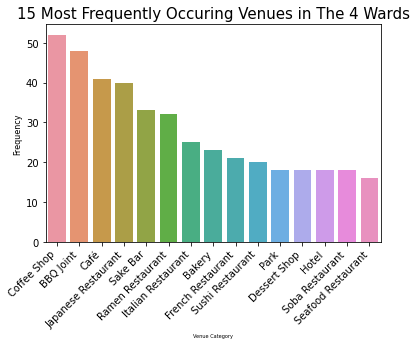

<Figure size 1296x504 with 0 Axes>

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data= Tokyo_Venues_Top15)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("15 Most Frequently Occuring Venues in The 4 Wards" , fontsize=15)
plt.xlabel("Venue Category", fontsize=5)
plt.ylabel ("Frequency", fontsize=8)
plt.savefig("Most_Freq_Venues1.png", dpi=300,  bbox_inches = "tight")
fig = plt.figure(figsize=(18,7))
plt.tight_layout()
plt.show()



#### Analyze Each Districts


#### How many unique venues in each district

In [ ]:
no_venues_each = Tokyo_venues_csv.groupby('District')['Venue Category'].nunique()
no_venues_eachh= pd.DataFrame(no_venues_each)
no_venues_eachh = no_venues_eachh.rename(columns = {"Venue Category" : "NoofCategory"}).reset_index()

In [ ]:
list_ven_no =no_venues_eachh['NoofCategory'].to_list()
list_dist =no_venues_eachh['District'].to_list()


In [ ]:
no_venues_eachh

District  NoofCategory
0         Akasaka            23
1          Aoyama            17
2         Asakusa            39
3           Azabu            23
4      Daikanyama            33
5           Ebisu            24
6    Hamamatsuchō            17
7        Harajuku            36
8           Hiroo            12
9            Mita            34
10      Morishita            44
11       Roppongi            33
12        Ryōgoku            20
13      Shinbashi            43
14      Toranomon            24
15      Kinshichō            45
16         Odaiba            54
17        Shibuya            39
18           Ueno            47

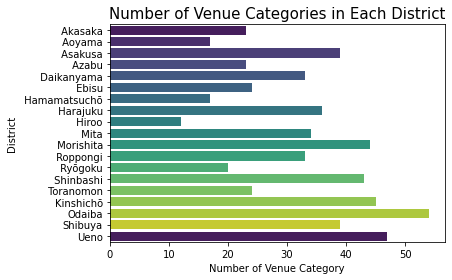

<Figure size 1296x504 with 0 Axes>

In [ ]:
palett = sns.color_palette("viridis",18)

ss=sns.barplot(x="NoofCategory", y="District", data= no_venues_eachh,palette= palett)
# ss.set_xticklabels(ss.get_xticklabels())

plt.title('Number of Venue Categories in Each District', fontsize=15)
plt.xlabel("Number of Venue Category")
plt.ylabel ("District")
plt.savefig("Unique_venues_each_district.png", dpi=300, bbox_inches = "tight")
fig = plt.figure(figsize=(18,7))
plt.show()


In [ ]:
#How many uniqye vennues...in the 4 wards
no_venues_each_w = Tokyo_venues_csv.groupby('Ward')['Venue Category'].nunique()
no_venues_eachh_w= pd.DataFrame(no_venues_each_w)
no_venues_eachh_w = no_venues_eachh_w.rename(columns = {"Venue Category" : "NoofCategory"}).reset_index()

In [ ]:
list_ven_no_w =no_venues_eachh_w['NoofCategory'].to_list()
list_ward =no_venues_eachh_w['Ward'].to_list()


In [ ]:
no_venues_eachh_w

Ward  NoofCategory
0   Minato           127
1  Shibuya            85
2   Sumida            73
3    Taitō            70

In [ ]:
no_venues_eachh_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ward          4 non-null      object
 1   NoofCategory  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


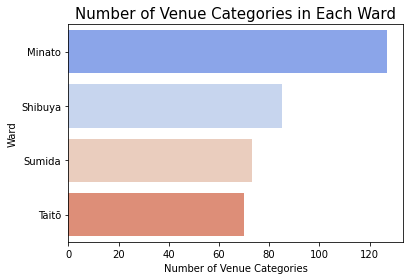

<Figure size 1296x504 with 0 Axes>

In [ ]:
palett = sns.color_palette("rocket_r")

ss=sns.barplot(x="NoofCategory", y="Ward", data= no_venues_eachh_w,palette= "coolwarm")
# ss.set_xticklabels(ss.get_xticklabels())

plt.title('Number of Venue Categories in Each Ward', fontsize=15)
plt.xlabel("Number of Venue Categories")
plt.ylabel ("Ward")
plt.savefig("Unique_venues_each_ward.png", dpi=300,  bbox_inches = "tight")
fig = plt.figure(figsize=(18,7))
plt.show()


In [ ]:
#See which districts are in the ward that has most unique venues
numdist_Minato = Tokyo_venues_csv["District"][Tokyo_venues_csv["Ward"]=='Minato'].unique()

numdist_Minato.tolist()

['Odaiba',
 ' Shinbashi',
 ' Azabu',
 ' Mita',
 ' Aoyama',
 ' Toranomon',
 ' Hamamatsuchō',
 ' Akasaka',
 ' Roppongi']

In [ ]:
#See which districts are in the ward that has LEE unique venues

numdist_Taito = Tokyo_venues_csv["District"][Tokyo_venues_csv["Ward"]=='Taitō'].unique()

numdist_Taito.tolist()

['Ueno', ' Asakusa']

#### Once we have all the different buildings I will group them by their district to make it more readable and more understandable, and once it is grouped, I will apply One Hot Encoding to extract the dummy variables of all of those buildings. I will do that to help me after to know what is the most frequency thing in each district. For this, I will use the following code:

After, we will group them by district and apply the mean so I will be able to see the amount in each district, having as a result a table like this:

In [ ]:
# one hot encoding
tokyo_onehot = pd.get_dummies(Tokyo_venues_csv[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot['District'] = Tokyo_venues_csv['District'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot[100:300]

District  Accessories Store  American Restaurant  Aquarium  \
100     Akasaka                  0                    0         0   
101    Harajuku                  0                    0         0   
102        Ueno                  0                    0         0   
103   Morishita                  0                    0         0   
104   Shinbashi                  0                    0         0   
..          ...                ...                  ...       ...   
295     Ryōgoku                  0                    0         0   
296        Ueno                  0                    0         0   
297    Harajuku                  0                    0         0   
298    Harajuku                  0                    0         0   
299     Akasaka                  0                    0         0   

     Art Gallery  Art Museum  Arts & Crafts Store  Auditorium  \
100            0           0                    0           0   
101            0           0                    0           0   
102            0           0                    0           0   
103            0           0                    0           0   
104            0           0                    0           0   
..           ...         ...                  ...         ...   
295            0           0                    0           0   
296            0           0                    0           0   
297            0           0                    0           0   
298            0           0                    1           0   
299            0           0                    0           0   

     Australian Restaurant  BBQ Joint  ...  Unagi Restaurant  \
100                      0          0  ...                 0   
101                      0          0  ...                 0   
102                      0          0  ...                 0   
103                      0          0  ...                 0   
104                      1          0  ...                 0   
..                     ...        ...  ...               ...   
295                      0          0  ...                 0   
296                      0          0  ...                 0   
297                      0          0  ...                 0   
298                      0          0  ...                 0   
299                      0          0  ...                 0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Wagashi Place  \
100                              0                      0              0   
101                              0                      0              0   
102                              0                      0              0   
103                              0                      0              0   
104                              0                      0              0   
..                             ...                    ...            ...   
295                              0                      0              0   
296                              0                      0              0   
297                              0                      0              0   
298                              0                      0              0   
299                              0                      0              0   

     Well  Whisky Bar  Wine Bar  Yakitori Restaurant  Yoshoku Restaurant  Zoo  
100     0           0         0                    0                   0    0  
101     0           0         0                    0                   0    0  
102     0           0         0                    0                   0    0  
103     0           0         0                    0                   0    0  
104     0           0         0                    0                   0    0  
..    ...         ...       ...                  ...                 ...  ...  
295     0           0         0                    0                   0    0  
296     0           0         0                    0                   0   

In [ ]:
tokyo_onehot.shape

(966, 190)

Next, let's group rows by district and by taking the mean of the frequency of occurrence of each category


In [ ]:
Tokyo_grouped = tokyo_onehot.groupby('District').mean().reset_index()
Tokyo_grouped

District  Accessories Store  American Restaurant  Aquarium  \
0         Akasaka           0.000000             0.027027  0.000000   
1          Aoyama           0.000000             0.000000  0.000000   
2         Asakusa           0.000000             0.000000  0.013333   
3           Azabu           0.000000             0.000000  0.000000   
4      Daikanyama           0.000000             0.000000  0.000000   
5           Ebisu           0.000000             0.030303  0.000000   
6    Hamamatsuchō           0.000000             0.000000  0.000000   
7        Harajuku           0.000000             0.000000  0.000000   
8           Hiroo           0.000000             0.000000  0.000000   
9            Mita           0.000000             0.000000  0.000000   
10      Morishita           0.000000             0.000000  0.000000   
11       Roppongi           0.000000             0.000000  0.000000   
12        Ryōgoku           0.000000             0.000000  0.000000   
13      Shinbashi           0.015152             0.000000  0.000000   
14      Toranomon           0.000000             0.000000  0.000000   
15      Kinshichō           0.000000             0.012346  0.000000   
16         Odaiba           0.000000             0.020000  0.000000   
17        Shibuya           0.000000             0.000000  0.000000   
18           Ueno           0.000000             0.000000  0.000000   

    Art Gallery  Art Museum  Arts & Crafts Store  Auditorium  \
0      0.000000    0.000000             0.000000        0.00   
1      0.000000    0.043478             0.000000        0.00   
2      0.000000    0.000000             0.026667        0.00   
3      0.000000    0.000000             0.000000        0.00   
4      0.000000    0.000000             0.000000        0.00   
5      0.000000    0.060606             0.000000        0.00   
6      0.000000    0.000000             0.000000        0.00   
7      0.019231    0.000000             0.019231        0.00   
8      0.000000    0.000000             0.000000        0.00   
9      0.000000    0.000000             0.000000        0.00   
10     0.000000    0.014085             0.000000        0.00   
11     0.021739    0.065217             0.000000        0.00   
12     0.000000    0.000000             0.000000        0.00   
13     0.000000    0.000000             0.000000        0.00   
14     0.000000    0.035714             0.000000        0.00   
15     0.000000    0.000000             0.000000        0.00   
16     0.000000    0.010000             0.000000        0.01   
17     0.000000    0.000000             0.000000        0.00   
18     0.000000    0.031915             0.000000        0.00   

    Australian Restaurant  BBQ Joint  ...  Unagi Restaurant  \
0                0.000000   0.108108  ...          0.027027   
1                0.000000   0.000000  ...          0.000000   
2                0.000000   0.040000  ...          0.013333   
3                0.000000   0.000000  ...          0.035714   
4                0.000000   0.038462  ...          0.000000   
5                0.000000   0.060606  ...          0.000000   
6                0.000000   0.050000  ...          0.000000   
7                0.000000   0.000000  ...          0.000000   
8                0.000000   0.176471  ...          0.000000   
9                0.000000   0.117647  ...          0.000000   
10               0.000000   0.070423  ...          0.000000   
11               0.000000   0.021739  ...          0.000000   
12               0.000000   0.037037  ...          0.000000   
13               0.015152   0.030303  ...          0.015152   
14               0.000000   0.000000  ...          0.000000   
15               0.000000   0.074074  ...          0.000000   
16               0.010000   0.010000  ...          0.000000   
17               0.000000   0.030769  ...          0.015385   
18               0.000000   0.095745  ...          0.000000   

    Vegetarian / Vegan Restaurant  Vietnamese 

Now that I have the most frequency thing in each district and with the following code:

Let's print each neighborhood along with the top 15 most common venues

In [ ]:
num_top_venues = 15

for hood in Tokyo_grouped['District']:
    print("----"+hood+"----")
    temp = Tokyo_grouped[Tokyo_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Akasaka----
                  venue  freq
0             BBQ Joint  0.11
1                 Hotel  0.08
2     French Restaurant  0.08
3          Concert Hall  0.08
4         Wagashi Place  0.05
5          Dessert Shop  0.05
6                Bakery  0.05
7    Kaiseki Restaurant  0.05
8    Chinese Restaurant  0.05
9   Szechuan Restaurant  0.03
10      Nabe Restaurant  0.03
11          Coffee Shop  0.03
12               Bistro  0.03
13   Italian Restaurant  0.03
14               Palace  0.03


---- Aoyama----
                  venue  freq
0                  Café  0.13
1      Baseball Stadium  0.13
2           Coffee Shop  0.09
3     French Restaurant  0.09
4   Japanese Restaurant  0.04
5                   Pub  0.04
6                 Hotel  0.04
7                  Park  0.04
8              Boutique  0.04
9       Thai Restaurant  0.04
10  Sporting Goods Shop  0.04
11                Trail  0.04
12               Garden  0.04
13        Rugby Stadium  0.04
14             Wine Bar  0.04


---

In [ ]:
#Let's put that into a pandas dataframe and display the top 1 venues for each district.


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = Tokyo_grouped['District']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

District 1st Most Common Venue 2nd Most Common Venue  \
0         Akasaka             BBQ Joint          Concert Hall   
1          Aoyama                  Café      Baseball Stadium   
2         Asakusa           Coffee Shop              Sake Bar   
3           Azabu    Italian Restaurant           Pizza Place   
4      Daikanyama           Coffee Shop     French Restaurant   
5           Ebisu           Coffee Shop    Italian Restaurant   
6    Hamamatsuchō      Sushi Restaurant    Seafood Restaurant   
7        Harajuku   Japanese Restaurant              Boutique   
8           Hiroo             BBQ Joint          Burger Joint   
9            Mita             BBQ Joint                Bakery   
10      Morishita             BBQ Joint    Tempura Restaurant   
11       Roppongi            Steakhouse            Art Museum   
12        Ryōgoku              Sake Bar      Ramen Restaurant   
13      Shinbashi      Sushi Restaurant   Japanese Restaurant   
14      Toranomon                 Hotel             Hotel Bar   
15      Kinshichō      Ramen Restaurant             BBQ Joint   
16         Odaiba                  Park            Theme Park   
17        Shibuya                  Café           Coffee Shop   
18           Ueno             BBQ Joint                  Café   

        3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0                       Hotel     French Restaurant      Chinese Restaurant   
1                 Coffee Shop     French Restaurant     Japanese Restaurant   
2                      Bakery   Japanese Restaurant            Dessert Shop   
3                   Bookstore       Soba Restaurant              Playground   
4                        Café      Ramen Restaurant             Pizza Place   
5   Japanese Curry Restaurant            Art Museum         Udon Restaurant   
6         Japanese Restaurant            Hobby Shop     Tonkatsu Restaurant   
7                 Coffee Shop                  Café               Gift Shop   
8          Italian Restaurant     French Restaurant               Jazz Club   
9          Italian Restaurant                  Café             Coffee Shop   
10                Coffee Shop   Japanese Restaurant                  Bakery   
11           Sushi Restaurant           Coffee Shop     Japanese Restaurant   
12                   Beer Bar    Seafood Restaurant         Thai Restaurant   
13               Dessert Shop        Clothing Store             Coffee Shop   
14                    Theater          Dessert Shop  Furniture / Home Store   
15                   Sake Bar   Japanese Restaurant     Dumpling Restaurant   
16                    Exhibit     Convenience Store             Coffee Shop   
17        Japanese Restaurant              Wine Bar                     Bar   
18           Ramen Restaurant              Sake Bar     Tonkatsu Restaurant   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Dessert Shop    Kaiseki Restaurant         Wagashi Place   
1                       Hotel                   Pub   Sporting Goods Shop   
2          Yoshoku Restaurant                  Café         Wagashi Place   
3           Food & Drink Shop        Breakfast Spot           Supermarket   
4             Thai Restaurant             BBQ Joint                Bakery   
5                   BBQ Joint          Liquor Store    Dim Sum Restaurant   
6                        Park          Burger Joint                Garden   
7                   Nightclub            Shoe Store        Clothing Store   
8                        Park                Bistro                Bakery   
9         Sukiyaki Restaurant    Seafood Restaurant      Ramen Restaurant   
10            Soba Restaurant    Italian Restaurant       Nabe Restaurant   
11                  Jazz Club             Hotel Bar                 Hotel   
12                     Hostel        History Museum           Pizza Place   
13                    Theater    Yoshoku Restaura

### Cluster Neighborhoods

To implement this algorithm, it is very important to determine the optimal number of clusters (i.e. k).

Let's determine k using elbow method:

In [ ]:
Tokyo_grouped_clustering = Tokyo_grouped.drop('District', 1)


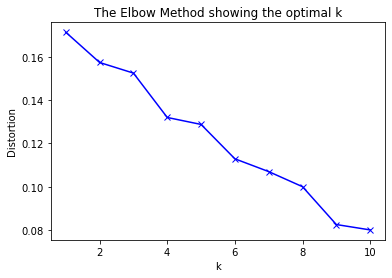

In [ ]:
# determine k using elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Tokyo_grouped_clustering)
    kmeanModel.fit(Tokyo_grouped_clustering)
    distortions.append(sum(np.min(cdist(Tokyo_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Tokyo_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')

plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Sometimes, Elbow method does not give the required result, which happened in this case.

Let's try a different method of finding the best value for k.

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
k_sil = range(2,19)
#min of 2 clst req to define dissim.
for k in k_sil:
    print(k, end=" ")
    kmeans = KMeans(n_clusters = k).fit(Tokyo_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(Tokyo_grouped_clustering,labels, metric = 'euclidean'))


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

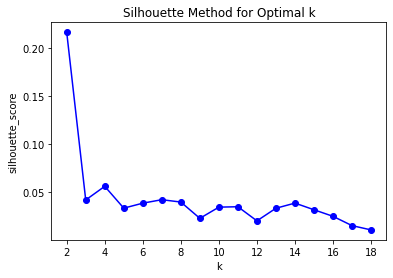

In [ ]:
plt.plot(k_sil, sil, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method for Optimal k')
plt.show()

There is a peak at k = 2,4. However, Two and four number of clusters will cluster the districts very broadly. 

Therefore, in this case, the number of clusters (i.e. ‘k’) is chosen to be 6.


Run k-means to cluster the districts into 4  clusters.

In [ ]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 0, 2, 1, 2, 2, 1, 3, 0], dtype=int32)

In [ ]:
k_means_labels = kmeans.labels_
k_means_labels

array([2, 1, 0, 2, 1, 2, 2, 1, 3, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
      dtype=int32)

In [ ]:
k_means_cluster_centers = kmeans.cluster_centers_


In [ ]:
df_tokyo.head(1)

Ward  Density District  District Latitude  District Longitude
0  Taitō    19830     Ueno          35.713376          139.776656

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [ ]:
# Add clustering labels

# neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True) #for re-run
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# tokyo_mergedd = Tokyo_venues_csv

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_mergedd = df_tokyo.join(neighborhoods_venues_sorted.set_index('District'), on='District')
tokyo_mergedd['Cluster Labels'] = tokyo_mergedd['Cluster Labels'].fillna(0)
tokyo_mergedd['Cluster Labels'] = tokyo_mergedd['Cluster Labels'].astype(int)




tokyo_mergedd = tokyo_mergedd.drop(columns=[ 'Density'])

tokyo_mergedd.head() # check the last columns!

Ward   District  District Latitude  District Longitude  Cluster Labels  \
0    Taitō       Ueno          35.713376          139.776656               0   
1    Taitō    Asakusa          35.717597          139.797563               0   
2  Shibuya    Shibuya          35.664596          139.698711               0   
3  Shibuya      Ebisu          35.646438          139.710210               2   
4  Shibuya   Harajuku          35.668705          139.705336               1   

  1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
0             BBQ Joint                  Café           Ramen Restaurant   
1           Coffee Shop              Sake Bar                     Bakery   
2                  Café           Coffee Shop        Japanese Restaurant   
3           Coffee Shop    Italian Restaurant  Japanese Curry Restaurant   
4   Japanese Restaurant              Boutique                Coffee Shop   

  4th Most Common Venue 5th Most Common Venue      6th Most Common Venue  \
0              Sake Bar   Tonkatsu Restaurant                Coffee Shop   
1   Japanese Restaurant          Dessert Shop         Yoshoku Restaurant   
2              Wine Bar                   Bar  Japanese Curry Restaurant   
3            Art Museum       Udon Restaurant                  BBQ Joint   
4                  Café             Gift Shop                  Nightclub   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        History Museum    Chinese Restaurant       Soba Restaurant   
1                  Café         Wagashi Place       Soba Restaurant   
2     French Restaurant          Dessert Shop              Sake Bar   
3          Liquor Store    Dim Sum Restaurant      Ramen Restaurant   
4            Shoe Store        Clothing Store    Italian Restaurant   

  10th Most Common Venue  
0             Art Museum  
1              BBQ Joint  
2       Ramen Restaurant  
3     Seafood Restaurant  
4     Chinese Restaurant

In [ ]:
tokyo_mergedd.to_csv('tokyo_mergedd_with_labels.csv',index=False)

# Kmean Clustering labels STARTs here!!! Open here!!!!

In [ ]:
tokyo_mergedd = pd.read_csv('tokyo_mergedd_with_labels.csv')

In [ ]:
#Find null or NaN rows
tokyo_mergedd[tokyo_mergedd.isna().any(axis=1)]

Empty DataFrame
Columns: [Ward, District, District Latitude, District Longitude, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

Finally, let's visualize the resulting clusters



In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_mergedd['District Latitude'], tokyo_mergedd['District Longitude'], tokyo_mergedd['District'], tokyo_mergedd['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [ ]:
map_clusters.save('visualize clusters.html')

# Examine the Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.
Based on the defining categories, you can then assign a name to each cluster. 

### Cluster 1


In [ ]:
tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 0, tokyo_mergedd.columns[[0] + list(range(1, tokyo_mergedd.shape[1]))]]

Ward    District  District Latitude  District Longitude  \
0     Taitō        Ueno          35.713376          139.776656   
1     Taitō     Asakusa          35.717597          139.797563   
2   Shibuya     Shibuya          35.664596          139.698711   
7    Sumida   Kinshichō          35.696312          139.815043   
8    Sumida   Morishita          35.687998          139.797044   
9    Sumida     Ryōgoku          35.696854          139.797428   
13   Minato        Mita          35.647200          139.740900   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                0             BBQ Joint                  Café   
1                0           Coffee Shop              Sake Bar   
2                0                  Café           Coffee Shop   
7                0      Ramen Restaurant             BBQ Joint   
8                0             BBQ Joint    Tempura Restaurant   
9                0              Sake Bar      Ramen Restaurant   
13               0             BBQ Joint                Bakery   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0       Ramen Restaurant              Sake Bar   Tonkatsu Restaurant   
1                 Bakery   Japanese Restaurant          Dessert Shop   
2    Japanese Restaurant              Wine Bar                   Bar   
7               Sake Bar   Japanese Restaurant   Dumpling Restaurant   
8            Coffee Shop   Japanese Restaurant                Bakery   
9               Beer Bar    Seafood Restaurant       Thai Restaurant   
13    Italian Restaurant                  Café           Coffee Shop   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Coffee Shop        History Museum    Chinese Restaurant   
1          Yoshoku Restaurant                  Café         Wagashi Place   
2   Japanese Curry Restaurant     French Restaurant          Dessert Shop   
7             Thai Restaurant                  Café           Coffee Shop   
8             Soba Restaurant    Italian Restaurant       Nabe Restaurant   
9                      Hostel        History Museum           Pizza Place   
13        Sukiyaki Restaurant    Seafood Restaurant      Ramen Restaurant   

   9th Most Common Venue 10th Most Common Venue  
0        Soba Restaurant             Art Museum  
1        Soba Restaurant              BBQ Joint  
2               Sake Bar       Ramen Restaurant  
7                    Bar           Gourmet Shop  
8     Yoshoku Restaurant           Burger Joint  
9            Coffee Shop        Soba Restaurant  
13          Dessert Shop     Chinese Restaurant

In [ ]:
tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 0]['1st Most Common Venue'].value_counts()

BBQ Joint           3
Ramen Restaurant    1
Coffee Shop         1
Sake Bar            1
Café                1
Name: 1st Most Common Venue, dtype: int64

### Cluster 2

In [ ]:
tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 1, tokyo_mergedd.columns[[0] + list(range(1, tokyo_mergedd.shape[1]))]]

Ward     District  District Latitude  District Longitude  \
4   Shibuya     Harajuku          35.668705          139.705336   
5   Shibuya   Daikanyama          35.648157          139.703293   
16   Minato       Aoyama          35.672000          139.723000   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
4                1   Japanese Restaurant              Boutique   
5                1           Coffee Shop     French Restaurant   
16               1                  Café      Baseball Stadium   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
4            Coffee Shop                  Café             Gift Shop   
5                   Café      Ramen Restaurant           Pizza Place   
16           Coffee Shop     French Restaurant   Japanese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4              Nightclub            Shoe Store        Clothing Store   
5        Thai Restaurant             BBQ Joint                Bakery   
16                 Hotel                   Pub   Sporting Goods Shop   

   9th Most Common Venue 10th Most Common Venue  
4     Italian Restaurant     Chinese Restaurant  
5               Sake Bar    Japanese Restaurant  
16                  Park                 Garden

In [ ]:
tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 1]['1st Most Common Venue'].value_counts()

Japanese Restaurant    1
Coffee Shop            1
Café                   1
Name: 1st Most Common Venue, dtype: int64

### Cluster 3

In [ ]:
Cluster3 = tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 2, tokyo_mergedd.columns[[0] + list(range(1, tokyo_mergedd.shape[1]))]]
Cluster3

Ward       District  District Latitude  District Longitude  \
3   Shibuya          Ebisu          35.646438          139.710210   
10   Minato         Odaiba          35.619050          139.779364   
11   Minato      Shinbashi          35.665106          139.756116   
12   Minato   Hamamatsuchō          35.655111          139.757062   
14   Minato       Roppongi          35.662457          139.733498   
15   Minato      Toranomon          35.670187          139.750056   
17   Minato          Azabu          35.656402          139.733970   
18   Minato        Akasaka          35.671679          139.735622   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                2           Coffee Shop    Italian Restaurant   
10               2                  Park            Theme Park   
11               2      Sushi Restaurant   Japanese Restaurant   
12               2      Sushi Restaurant    Seafood Restaurant   
14               2            Steakhouse            Art Museum   
15               2                 Hotel             Hotel Bar   
17               2    Italian Restaurant           Pizza Place   
18               2             BBQ Joint          Concert Hall   

        3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
3   Japanese Curry Restaurant            Art Museum         Udon Restaurant   
10                    Exhibit     Convenience Store             Coffee Shop   
11               Dessert Shop        Clothing Store             Coffee Shop   
12        Japanese Restaurant            Hobby Shop     Tonkatsu Restaurant   
14           Sushi Restaurant           Coffee Shop     Japanese Restaurant   
15                    Theater          Dessert Shop  Furniture / Home Store   
17                  Bookstore       Soba Restaurant              Playground   
18                      Hotel     French Restaurant      Chinese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3              BBQ Joint          Liquor Store    Dim Sum Restaurant   
10                 Hotel                  Café    Italian Restaurant   
11               Theater    Yoshoku Restaurant     German Restaurant   
12                  Park          Burger Joint                Garden   
14             Jazz Club             Hotel Bar                 Hotel   
15              Tea Room                Palace                Garden   
17     Food & Drink Shop        Breakfast Spot           Supermarket   
18          Dessert Shop    Kaiseki Restaurant         Wagashi Place   

   9th Most Common Venue 10th Most Common Venue  
3       Ramen Restaurant     Seafood Restaurant  
10        Discount Store          Shopping Mall  
11              Sake Bar     Seafood Restaurant  
12             Bookstore               Beer Bar  
14     French Restaurant           Cocktail Bar  
15                  Park             Steakhouse  
17    Chinese Restaurant             Smoke Shop  
18                Bakery                 Garden

In [ ]:
tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 2]['1st Most Common Venue'].value_counts()

Sushi Restaurant      2
Steakhouse            1
Park                  1
Coffee Shop           1
Hotel                 1
BBQ Joint             1
Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64

### Cluster 4

In [ ]:
tokyo_mergedd.loc[tokyo_mergedd['Cluster Labels'] == 3, tokyo_mergedd.columns[[0] + list(range(1, tokyo_mergedd.shape[1]))]]

Ward District  District Latitude  District Longitude  Cluster Labels  \
6  Shibuya    Hiroo            35.6505            139.7173               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
6             BBQ Joint          Burger Joint    Italian Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
6     French Restaurant             Jazz Club                  Park   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
6                Bistro                Bakery           Coffee Shop   

  10th Most Common Venue  
6     Israeli Restaurant

Let's do clustering based on wards

In [ ]:
# one hot encoding
tokyo_onehot = pd.get_dummies(Tokyo_venues_csv[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot['Ward'] = Tokyo_venues_csv['Ward'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot[100:300]

Ward  Accessories Store  American Restaurant  Aquarium  Art Gallery  \
100   Minato                  0                    0         0            0   
101  Shibuya                  0                    0         0            0   
102    Taitō                  0                    0         0            0   
103   Sumida                  0                    0         0            0   
104   Minato                  0                    0         0            0   
..       ...                ...                  ...       ...          ...   
295   Sumida                  0                    0         0            0   
296    Taitō                  0                    0         0            0   
297  Shibuya                  0                    0         0            0   
298  Shibuya                  0                    0         0            0   
299   Minato                  0                    0         0            0   

     Art Museum  Arts & Crafts Store  Auditorium  Australian Restaurant  \
100           0                    0           0                      0   
101           0                    0           0                      0   
102           0                    0           0                      0   
103           0                    0           0                      0   
104           0                    0           0                      1   
..          ...                  ...         ...                    ...   
295           0                    0           0                      0   
296           0                    0           0                      0   
297           0                    0           0                      0   
298           0                    1           0                      0   
299           0                    0           0                      0   

     BBQ Joint  ...  Unagi Restaurant  Vegetarian / Vegan Restaurant  \
100          0  ...                 0                              0   
101          0  ...                 0                              0   
102          0  ...                 0                              0   
103          0  ...                 0                              0   
104          0  ...                 0                              0   
..         ...  ...               ...                            ...   
295          0  ...                 0                              0   
296          0  ...                 0                              0   
297          0  ...                 0                              0   
298          0  ...                 0                              0   
299          0  ...                 0                              0   

     Vietnamese Restaurant  Wagashi Place  Well  Whisky Bar  Wine Bar  \
100                      0              0     0           0         0   
101                      0              0     0           0         0   
102                      0              0     0           0         0   
103                      0              0     0           0         0   
104                      0              0     0           0         0   
..                     ...            ...   ...         ...       ...   
295                      0              0     0           0         0   
296                      0              0     0           0         0   
297                      0              0     0           0         0   
298                      0              0     0           0         0   
299                      0              0     0           0         0   

     Yakitori Restaurant  Yoshoku Restaurant  Zoo  
100                    0                   0    0  
101                    0                   0    0  
102                    0                   0    0  
103                    0                   0    0  
104                    0                   0    0  
..                   ...                 ...  ...  
295                    0                   0    0  


In [ ]:
Tokyo_grouped2 = tokyo_onehot.groupby('Ward').mean().reset_index()
Tokyo_grouped2

Ward  Accessories Store  American Restaurant  Aquarium  Art Gallery  \
0   Minato           0.002506             0.007519  0.000000     0.002506   
1  Shibuya           0.000000             0.004566  0.000000     0.004566   
2   Sumida           0.000000             0.005587  0.000000     0.000000   
3    Taitō           0.000000             0.000000  0.005917     0.000000   

   Art Museum  Arts & Crafts Store  Auditorium  Australian Restaurant  \
0    0.015038             0.000000    0.002506               0.005013   
1    0.009132             0.004566    0.000000               0.000000   
2    0.005587             0.000000    0.000000               0.000000   
3    0.017751             0.011834    0.000000               0.000000   

   BBQ Joint  ...  Unagi Restaurant  Vegetarian / Vegan Restaurant  \
0   0.037594  ...          0.007519                       0.000000   
1   0.041096  ...          0.004566                       0.000000   
2   0.067039  ...          0.000000                       0.000000   
3   0.071006  ...          0.005917                       0.005917   

   Vietnamese Restaurant  Wagashi Place      Well  Whisky Bar  Wine Bar  \
0               0.000000       0.015038  0.000000    0.002506  0.002506   
1               0.004566       0.009132  0.004566    0.000000  0.013699   
2               0.005587       0.011173  0.000000    0.000000  0.005587   
3               0.000000       0.029586  0.000000    0.000000  0.000000   

   Yakitori Restaurant  Yoshoku Restaurant       Zoo  
0             0.007519            0.010025  0.000000  
1             0.013699            0.004566  0.000000  
2             0.016760            0.011173  0.000000  
3             0.000000            0.029586  0.005917  

[4 rows x 190 columns]

In [ ]:
num_top_venues = 25

for hood in Tokyo_grouped2['Ward']:
    print("----"+hood+"----")
    temp = Tokyo_grouped2[Tokyo_grouped2['Ward'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Minato----
                   venue  freq
0    Japanese Restaurant  0.04
1            Coffee Shop  0.04
2              BBQ Joint  0.04
3                  Hotel  0.04
4       Sushi Restaurant  0.03
5                   Park  0.03
6      French Restaurant  0.03
7                   Café  0.03
8                 Bakery  0.03
9     Seafood Restaurant  0.03
10    Italian Restaurant  0.03
11             Hotel Bar  0.02
12                Garden  0.02
13       Soba Restaurant  0.02
14          Dessert Shop  0.02
15            Art Museum  0.02
16         Wagashi Place  0.02
17   American Restaurant  0.01
18                 Plaza  0.01
19        Discount Store  0.01
20  Taiwanese Restaurant  0.01
21           Pizza Place  0.01
22             Multiplex  0.01
23           Supermarket  0.01
24   Sukiyaki Restaurant  0.01


----Shibuya----
                        venue  freq
0                 Coffee Shop  0.10
1                        Café  0.05
2         Japanese Restaurant  0.05
3           Frenc

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Ward'] = Tokyo_grouped2['Ward']

for ind in np.arange(Tokyo_grouped2.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped2.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2

Ward 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   Minato                 Hotel             BBQ Joint           Coffee Shop   
1  Shibuya           Coffee Shop                  Café   Japanese Restaurant   
2   Sumida      Ramen Restaurant              Sake Bar             BBQ Joint   
3    Taitō             BBQ Joint                  Café              Sake Bar   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0   Japanese Restaurant      Sushi Restaurant                  Café   
1             BBQ Joint     French Restaurant    Italian Restaurant   
2   Japanese Restaurant           Coffee Shop                  Café   
3           Coffee Shop      Ramen Restaurant       Soba Restaurant   

       7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Italian Restaurant                  Park    Seafood Restaurant   
1  Japanese Curry Restaurant              Sake Bar      Ramen Restaurant   
2         Chinese Restaurant       Soba Restaurant   Dumpling Restaurant   
3        Japanese Restaurant   Tonkatsu Restaurant    Yoshoku Restaurant   

  10th Most Common Venue  
0      French Restaurant  
1                 Bakery  
2     Tempura Restaurant  
3          Wagashi Place

In [ ]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

Tokyo_grouped2 = Tokyo_grouped2.drop('Ward', 1)

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped2)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10]

array([0, 2, 1, 3], dtype=int32)

In [ ]:
# Add clustering labels

# neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True) #for re-run
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans2.labels_)
# tokyo_mergedd = Tokyo_venues_csv

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_mergedd2 = df_tokyo.join(neighborhoods_venues_sorted2.set_index('Ward'), on='Ward')
tokyo_mergedd2['Cluster Labels'] = tokyo_mergedd2['Cluster Labels'].fillna(0)
tokyo_mergedd2['Cluster Labels'] = tokyo_mergedd2['Cluster Labels'].astype(int)



tokyo_mergedd2 # check the last columns!


Ward  Density       District  District Latitude  District Longitude  \
0     Taitō    19830           Ueno          35.713376          139.776656   
1     Taitō    19830        Asakusa          35.717597          139.797563   
2   Shibuya    15080        Shibuya          35.664596          139.698711   
3   Shibuya    15080          Ebisu          35.646438          139.710210   
4   Shibuya    15080       Harajuku          35.668705          139.705336   
5   Shibuya    15080     Daikanyama          35.648157          139.703293   
6   Shibuya    15080          Hiroo          35.650500          139.717300   
7    Sumida    18910      Kinshichō          35.696312          139.815043   
8    Sumida    18910      Morishita          35.687998          139.797044   
9    Sumida    18910        Ryōgoku          35.696854          139.797428   
10   Minato    12180         Odaiba          35.619050          139.779364   
11   Minato    12180      Shinbashi          35.665106          139.756116   
12   Minato    12180   Hamamatsuchō          35.655111          139.757062   
13   Minato    12180           Mita          35.647200          139.740900   
14   Minato    12180       Roppongi          35.662457          139.733498   
15   Minato    12180      Toranomon          35.670187          139.750056   
16   Minato    12180         Aoyama          35.672000          139.723000   
17   Minato    12180          Azabu          35.656402          139.733970   
18   Minato    12180        Akasaka          35.671679          139.735622   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                3             BBQ Joint                  Café   
1                3             BBQ Joint                  Café   
2                2           Coffee Shop                  Café   
3                2           Coffee Shop                  Café   
4                2           Coffee Shop                  Café   
5                2           Coffee Shop                  Café   
6                2           Coffee Shop                  Café   
7                1      Ramen Restaurant              Sake Bar   
8                1      Ramen Restaurant              Sake Bar   
9                1      Ramen Restaurant              Sake Bar   
10               0                 Hotel             BBQ Joint   
11               0                 Hotel             BBQ Joint   
12               0                 Hotel             BBQ Joint   
13               0                 Hotel             BBQ Joint   
14               0                 Hotel             BBQ Joint   
15               0                 Hotel             BBQ Joint   
16               0                 Hotel             BBQ Joint   
17               0                 Hotel             BBQ Joint   
18               0                 Hotel             BBQ Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0               Sake Bar           Coffee Shop      Ramen Restaurant   
1               Sake Bar           Coffee Shop      Ramen Restaurant   
2    Japanese Restaurant             BBQ Joint     French Restaurant   
3    Japanese Restaurant             BBQ Joint     French Restaurant   
4    Japanese Restaurant             BBQ Joint     French Restaurant   
5    Japanese Restaurant             BBQ Joint     French Restaurant   
6    Japanese Restaurant             BBQ Joint     French Restaurant   
7              BBQ Joint   Japanese Restaurant           Coffee Shop   
8              BBQ Joint   Japanese Restaurant           Coffee Shop   
9              BBQ Joint   Japanese Restaurant           Coffee Shop   
10           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
11           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
12           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
13           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
14           Coffee Shop   Japanese Restauran

Since there are only 4 wards, they can be clustered into 4 different clusters without using Kmeans.

In [ ]:
tokyo_mergedd2.loc[tokyo_mergedd2['Cluster Labels'] == 0, tokyo_mergedd2.columns[[0] + list(range(1, tokyo_mergedd2.shape[1]))]]

Ward  Density       District  District Latitude  District Longitude  \
10  Minato    12180         Odaiba          35.619050          139.779364   
11  Minato    12180      Shinbashi          35.665106          139.756116   
12  Minato    12180   Hamamatsuchō          35.655111          139.757062   
13  Minato    12180           Mita          35.647200          139.740900   
14  Minato    12180       Roppongi          35.662457          139.733498   
15  Minato    12180      Toranomon          35.670187          139.750056   
16  Minato    12180         Aoyama          35.672000          139.723000   
17  Minato    12180          Azabu          35.656402          139.733970   
18  Minato    12180        Akasaka          35.671679          139.735622   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
10               0                 Hotel             BBQ Joint   
11               0                 Hotel             BBQ Joint   
12               0                 Hotel             BBQ Joint   
13               0                 Hotel             BBQ Joint   
14               0                 Hotel             BBQ Joint   
15               0                 Hotel             BBQ Joint   
16               0                 Hotel             BBQ Joint   
17               0                 Hotel             BBQ Joint   
18               0                 Hotel             BBQ Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
11           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
12           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
13           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
14           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
15           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
16           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
17           Coffee Shop   Japanese Restaurant      Sushi Restaurant   
18           Coffee Shop   Japanese Restaurant      Sushi Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10                  Café    Italian Restaurant                  Park   
11                  Café    Italian Restaurant                  Park   
12                  Café    Italian Restaurant                  Park   
13                  Café    Italian Restaurant                  Park   
14                  Café    Italian Restaurant                  Park   
15                  Café    Italian Restaurant                  Park   
16                  Café    Italian Restaurant                  Park   
17                  Café    Italian Restaurant                  Park   
18                  Café    Italian Restaurant                  Park   

   9th Most Common Venue 10th Most Common Venue  
10    Seafood Restaurant      French Restaurant  
11    Seafood Restaurant      French Restaurant  
12    Seafood Restaurant      French Restaurant  
13    Seafood Restaurant      French Restaurant  
14    Seafood Restaurant      French Restaurant  
15    Seafood Restaurant      French Restaurant  
16    Seafood Restaurant      French Restaurant  
17    Seafood Restaurant      French Restaurant  
18    Seafood Restaurant      French Restaurant

In [ ]:
 tokyo_mergedd2.loc[tokyo_mergedd2['Cluster Labels'] == 1, tokyo_mergedd2.columns[[0] + list(range(1, tokyo_mergedd2.shape[1]))]]

Ward  Density    District  District Latitude  District Longitude  \
7  Sumida    18910   Kinshichō          35.696312          139.815043   
8  Sumida    18910   Morishita          35.687998          139.797044   
9  Sumida    18910     Ryōgoku          35.696854          139.797428   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
7               1      Ramen Restaurant              Sake Bar   
8               1      Ramen Restaurant              Sake Bar   
9               1      Ramen Restaurant              Sake Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
7             BBQ Joint   Japanese Restaurant           Coffee Shop   
8             BBQ Joint   Japanese Restaurant           Coffee Shop   
9             BBQ Joint   Japanese Restaurant           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
7                  Café    Chinese Restaurant       Soba Restaurant   
8                  Café    Chinese Restaurant       Soba Restaurant   
9                  Café    Chinese Restaurant       Soba Restaurant   

  9th Most Common Venue 10th Most Common Venue  
7   Dumpling Restaurant     Tempura Restaurant  
8   Dumpling Restaurant     Tempura Restaurant  
9   Dumpling Restaurant     Tempura Restaurant

In [ ]:
tokyo_mergedd2.loc[tokyo_mergedd2['Cluster Labels'] == 2, tokyo_mergedd2.columns[[0] + list(range(1, tokyo_mergedd2.shape[1]))]]

Ward  Density     District  District Latitude  District Longitude  \
2  Shibuya    15080      Shibuya          35.664596          139.698711   
3  Shibuya    15080        Ebisu          35.646438          139.710210   
4  Shibuya    15080     Harajuku          35.668705          139.705336   
5  Shibuya    15080   Daikanyama          35.648157          139.703293   
6  Shibuya    15080        Hiroo          35.650500          139.717300   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2               2           Coffee Shop                  Café   
3               2           Coffee Shop                  Café   
4               2           Coffee Shop                  Café   
5               2           Coffee Shop                  Café   
6               2           Coffee Shop                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2   Japanese Restaurant             BBQ Joint     French Restaurant   
3   Japanese Restaurant             BBQ Joint     French Restaurant   
4   Japanese Restaurant             BBQ Joint     French Restaurant   
5   Japanese Restaurant             BBQ Joint     French Restaurant   
6   Japanese Restaurant             BBQ Joint     French Restaurant   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
2    Italian Restaurant  Japanese Curry Restaurant              Sake Bar   
3    Italian Restaurant  Japanese Curry Restaurant              Sake Bar   
4    Italian Restaurant  Japanese Curry Restaurant              Sake Bar   
5    Italian Restaurant  Japanese Curry Restaurant              Sake Bar   
6    Italian Restaurant  Japanese Curry Restaurant              Sake Bar   

  9th Most Common Venue 10th Most Common Venue  
2      Ramen Restaurant                 Bakery  
3      Ramen Restaurant                 Bakery  
4      Ramen Restaurant                 Bakery  
5      Ramen Restaurant                 Bakery  
6      Ramen Restaurant                 Bakery

In [ ]:
tokyo_mergedd2.loc[tokyo_mergedd2['Cluster Labels'] == 3, tokyo_mergedd2.columns[[0] + list(range(1, tokyo_mergedd2.shape[1]))]]

Ward  Density  District  District Latitude  District Longitude  \
0  Taitō    19830      Ueno          35.713376          139.776656   
1  Taitō    19830   Asakusa          35.717597          139.797563   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               3             BBQ Joint                  Café   
1               3             BBQ Joint                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Sake Bar           Coffee Shop      Ramen Restaurant   
1              Sake Bar           Coffee Shop      Ramen Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Soba Restaurant   Japanese Restaurant   Tonkatsu Restaurant   
1       Soba Restaurant   Japanese Restaurant   Tonkatsu Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    Yoshoku Restaurant          Wagashi Place  
1    Yoshoku Restaurant          Wagashi Place

### Let's see if the restaurants are removed...
Note that bakery or dessert shops are kept

In [ ]:
l = ['Cafe','Restaurant', 'Coffee Shop', 'Café', 'BBQ','Bistro', 'Bakery', 'Joint', 'Pizza']  
regstr = '|'.join(l)

no_food = Tokyo_venues_csv[~Tokyo_venues_csv['Venue Category'].str.contains(regstr)]
no_food.head()

District  District Latitude  District Longitude  \
1   Ryōgoku          35.696854          139.797428   
4    Aoyama          35.672000          139.723000   
5   Shibuya          35.664596          139.698711   
6    Odaiba          35.619050          139.779364   
8    Aoyama          35.672000          139.723000   

                                               Venue  Venue Latitude  \
1             APA Hotel & Resort (アパホテル&リゾート 両国駅タワー)       35.697346   
4  Mitsui Garden Hotel Jingugaien Tokyo Premier (...       35.680017   
5                                        SHIBUYA SKY       35.658310   
6                                        ODAIBAゲーマーズ       35.629680   
8              Japan Olympic Museum (日本オリンピックミュージアム)       35.675048   

   Venue Longitude    Address  Venue distance  Venue Category  \
1       139.794422  横網1-11-10             277           Hotel   
4       139.715629   霞ヶ丘町11-3            1113           Hotel   
5       139.702220  渋谷2-24-12             768  Scenic Lookout   
6       139.776640    台場1-6-1            1208      Hobby Shop   
8       139.714969    霞ヶ丘町4-2             801          Museum   

                   Venue ID     Ward  No.Ward  
1  5f2925501007ac701a0ce29d   Sumida        2  
4  5dddfa1eaf03f30008efb7de   Minato        0  
5  5db1240443598d00073edbe0  Shibuya        1  
6  5d8da873009e7000071be88b   Minato        0  
8  5d7f1dcacda09f00084341b8   Minato        0

In [ ]:
map_no_food = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.spring(np.linspace(0, 1, len(ys)))
spring = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(no_food['Venue Latitude'], no_food['Venue Longitude'], no_food['Venue'], no_food['No.Ward']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=spring[cluster-1],
        fill=True,
        fill_color=spring[cluster-1],
        fill_opacity=1).add_to(map_no_food)
       
map_no_food


In [ ]:
# one hot encoding
tokyo_onehot_norest = pd.get_dummies(no_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot_norest['District'] = no_food['District'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot_norest.columns[-1]] + list(tokyo_onehot_norest.columns[:-1])
tokyo_onehot_norest = tokyo_onehot_norest[fixed_columns]

tokyo_onehot_norest.head()

District  Accessories Store  Art Gallery  Art Museum  Arts & Crafts Store  \
1   Ryōgoku                  0            0           0                    0   
4    Aoyama                  0            0           0                    0   
5   Shibuya                  0            0           0                    0   
6    Odaiba                  0            0           0                    0   
8    Aoyama                  0            0           0                    0   

   Athletics & Sports  Auditorium  Baby Store  Bagel Shop  Bar  ...  \
1                   0           0           0           0    0  ...   
4                   0           0           0           0    0  ...   
5                   0           0           0           0    0  ...   
6                   0           0           0           0    0  ...   
8                   0           0           0           0    0  ...   

   Theme Park Ride / Attraction  Tourist Information Center  Toy / Game Store  \
1                             0                           0                 0   
4                             0                           0                 0   
5                             0                           0                 0   
6                             0                           0                 0   
8                             0                           0                 0   

   Trail  Wagashi Place  Whisky Bar  Wine Bar  Wine Shop  Zoo  Zoo Exhibit  
1      0              0           0         0          0    0            0  
4      0              0           0         0          0    0            0  
5      0              0           0         0          0    0            0  
6      0              0           0         0          0    0            0  
8      0              0           0         0          0    0            0  

[5 rows x 151 columns]

In [ ]:
Tokyo_grouped3 = tokyo_onehot_norest.groupby('District').mean().reset_index()
Tokyo_grouped3

District  Accessories Store  Art Gallery  Art Museum  \
0         Akasaka           0.000000     0.000000    0.000000   
1          Aoyama           0.000000     0.000000    0.043478   
2         Asakusa           0.000000     0.000000    0.000000   
3           Azabu           0.000000     0.000000    0.000000   
4      Daikanyama           0.000000     0.000000    0.000000   
5           Ebisu           0.000000     0.000000    0.041667   
6    Hamamatsuchō           0.000000     0.000000    0.000000   
7        Harajuku           0.018519     0.037037    0.037037   
8           Hiroo           0.000000     0.000000    0.071429   
9            Mita           0.000000     0.000000    0.000000   
10      Morishita           0.000000     0.000000    0.034483   
11       Roppongi           0.000000     0.069767    0.069767   
12        Ryōgoku           0.000000     0.000000    0.000000   
13      Shinbashi           0.027027     0.054054    0.000000   
14      Toranomon           0.000000     0.000000    0.000000   
15      Kinshichō           0.000000     0.000000    0.000000   
16         Odaiba           0.000000     0.000000    0.027397   
17        Shibuya           0.000000     0.000000    0.023256   
18           Ueno           0.000000     0.000000    0.056604   

    Arts & Crafts Store  Athletics & Sports  Auditorium  Baby Store  \
0              0.000000            0.000000    0.000000    0.000000   
1              0.000000            0.043478    0.000000    0.000000   
2              0.000000            0.023810    0.000000    0.000000   
3              0.000000            0.000000    0.000000    0.000000   
4              0.000000            0.000000    0.000000    0.000000   
5              0.000000            0.000000    0.000000    0.000000   
6              0.000000            0.000000    0.000000    0.000000   
7              0.018519            0.000000    0.000000    0.000000   
8              0.000000            0.000000    0.000000    0.000000   
9              0.000000            0.000000    0.000000    0.000000   
10             0.000000            0.034483    0.000000    0.000000   
11             0.023256            0.000000    0.000000    0.000000   
12             0.000000            0.000000    0.000000    0.000000   
13             0.000000            0.000000    0.000000    0.000000   
14             0.000000            0.000000    0.000000    0.000000   
15             0.000000            0.000000    0.000000    0.032258   
16             0.000000            0.000000    0.013699    0.000000   
17             0.000000            0.000000    0.000000    0.000000   
18             0.000000            0.000000    0.000000    0.000000   

    Bagel Shop       Bar  ...  Theme Park Ride / Attraction  \
0     0.000000  0.043478  ...                      0.000000   
1     0.000000  0.000000  ...                      0.000000   
2     0.000000  0.047619  ...                      0.000000   
3     0.000000  0.000000  ...                      0.000000   
4     0.000000  0.031250  ...                      0.000000   
5     0.000000  0.125000  ...                      0.000000   
6     0.000000  0.000000  ...                      0.000000   
7     0.000000  0.018519  ...                      0.000000   
8     0.000000  0.000000  ...                      0.000000   
9     0.071429  0.071429  ...                      0.000000   
10    0.000000  0.000000  ...                      0.000000   
11    0.000000  0.046512  ...                      0.000000   
12    0.000000  0.032258  ...                      0.000000   
13    0.000000  0.027027  ...                      0.000000   
14    0.000000  0.000000  ...                      0.000000   
15    0.000000  0.064516  ...                      0.000000   
16    0.000000  0.000000  ...                      0.013699   
17    0.000000  0.093023  ...                      0.000000   
18    0.000000  0.037736  ...                      0.000000   

    Tourist Information Ce

In [ ]:
num_top_venues_norest = 5

for hood in Tokyo_grouped3['District']:
    print("----"+hood+"----")
    temp = Tokyo_grouped3[Tokyo_grouped3['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues_norest))
    print('\n')

---- Akasaka----
           venue  freq
0          Hotel  0.22
1   Dessert Shop  0.09
2   Concert Hall  0.09
3  Wagashi Place  0.09
4     Steakhouse  0.09


---- Aoyama----
              venue  freq
0  Baseball Stadium  0.22
1             Hotel  0.09
2     Rugby Stadium  0.04
3  Recording Studio  0.04
4              Park  0.04


---- Asakusa----
           venue  freq
0  Wagashi Place  0.12
1   Dessert Shop  0.10
2         Hostel  0.10
3       Sake Bar  0.07
4            Bar  0.05


---- Azabu----
           venue  freq
0  Grocery Store  0.10
1   Cocktail Bar  0.10
2     Steakhouse  0.10
3      Bookstore  0.05
4    Salad Place  0.05


---- Daikanyama----
          venue  freq
0  Dessert Shop  0.12
1        Lounge  0.06
2      Beer Bar  0.06
3          Pool  0.03
4    Steakhouse  0.03


---- Ebisu----
                    venue  freq
0                     Bar  0.12
1               Bookstore  0.08
2          Ice Cream Shop  0.04
3              Sports Bar  0.04
4  Furniture / Home Store  0

In [ ]:
top_venues_norest = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(top_venues_norest):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted3 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted3['District'] = Tokyo_grouped3['District']

for ind in np.arange(Tokyo_grouped3.shape[0]):
    neighborhoods_venues_sorted3.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped3.iloc[ind, :], top_venues_norest)

neighborhoods_venues_sorted3

District 1st Most Common Venue 2nd Most Common Venue  \
0         Akasaka                 Hotel            Steakhouse   
1          Aoyama      Baseball Stadium                 Hotel   
2         Asakusa         Wagashi Place                Hostel   
3           Azabu            Steakhouse          Cocktail Bar   
4      Daikanyama          Dessert Shop                Lounge   
5           Ebisu                   Bar             Bookstore   
6    Hamamatsuchō                 Hotel         Historic Site   
7        Harajuku              Boutique        Clothing Store   
8           Hiroo              Wine Bar              Sake Bar   
9            Mita              Sake Bar          Dessert Shop   
10      Morishita              Sake Bar              Beer Bar   
11       Roppongi            Steakhouse           Art Gallery   
12        Ryōgoku              Sake Bar                Hostel   
13      Shinbashi                 Hotel              Sake Bar   
14      Toranomon                 Hotel             Hotel Bar   
15      Kinshichō              Sake Bar                   Pub   
16         Odaiba                  Park               Exhibit   
17        Shibuya                   Bar              Sake Bar   
18           Ueno              Sake Bar        History Museum   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Concert Hall         Wagashi Place          Dessert Shop   
1                Theater      Recording Studio             Rock Club   
2           Dessert Shop              Sake Bar           Comedy Club   
3          Grocery Store             Hotel Bar            Playground   
4               Beer Bar           Planetarium         Shopping Mall   
5                  Plaza            Food Court                Museum   
6            Event Space       Bed & Breakfast                Garden   
7              Gift Shop            Shoe Store             Nightclub   
8         Breakfast Spot           Supermarket                 Hotel   
9              Rock Club            Bagel Shop           Supermarket   
10          Dessert Shop         Deli / Bodega             Gastropub   
11            Art Museum                 Hotel              Wine Bar   
12                 Hotel        History Museum             Gift Shop   
13           Art Gallery       Bed & Breakfast              Tea Room   
14         Historic Site               Theater           Beer Garden   
15          Gourmet Shop                   Bar                 Hotel   
16     Convenience Store                 Hotel                 Plaza   
17           Record Shop          Concert Hall              Wine Bar   
18           Zoo Exhibit            Art Museum         Wagashi Place   

   6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0                Theater                Beer Bar          Gourmet Shop   
1          Rugby Stadium            Cocktail Bar                  Park   
2                    Bar                    Park     Outdoor Sculpture   
3               Sake Bar             Salad Place           Event Space   
4              Nightclub          Chocolate Shop          Climbing Gym   
5          Movie Theater  Furniture / Home Store            Sports Bar   
6                   Park               Hotel Bar              Sake Bar   
7              Bookstore             Art Gallery            Art Museum   
8             Art Museum            Noodle House          Dessert Shop   
9              Drugstore    Gym / Fitness Center                Lounge   
10           Supermarket             Cheese Shop        Chocolate Shop   
11             Hotel Bar               Jazz Club             Gastropub   
12           Comedy Club          Clothing Store        Chocolate Shop   
13          Cocktail Bar       Accessories Store         Souvenir Shop   
14        Ice Cream Shop                 Library             Multiplex   
15          Climbing Gym             Sports Club               Stadium   
16       

In [ ]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

Tokyo_grouped3 = Tokyo_grouped3.drop('District', 1)

# run k-means clustering
kmeans3 = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped3)

# check cluster labels generated for each row in the dataframe
kmeans3.labels_[0:10]

array([0, 2, 3, 3, 3, 3, 0, 3, 1, 3], dtype=int32)

In [ ]:
# Add clustering labels

# neighborhoods_venues_sorted3.drop(columns=['Cluster Labels'], inplace=True) #for re-run
neighborhoods_venues_sorted3.insert(0, 'Cluster Labels', kmeans3.labels_)
# tokyo_mergedd3 = no_food

tokyo_mergedd3 = df_tokyo.join(neighborhoods_venues_sorted3.set_index('District'), on='District')
tokyo_mergedd3['Cluster Labels'] = tokyo_mergedd3['Cluster Labels'].fillna(0)
tokyo_mergedd3['Cluster Labels'] = tokyo_mergedd3['Cluster Labels'].astype(int)

# tokyo_mergedd3 = tokyo_mergedd3.drop(columns=['Venue','No.Ward', 'Venue ID', 'Venue Latitude', 'Venue Longitude','Address', 'Venue distance','Venue Category'])


tokyo_mergedd3.sort_values(['Cluster Labels'], ascending=[True]) # check the last columns!

Ward  Density       District  District Latitude  District Longitude  \
18   Minato    12180        Akasaka          35.671679          139.735622   
15   Minato    12180      Toranomon          35.670187          139.750056   
12   Minato    12180   Hamamatsuchō          35.655111          139.757062   
11   Minato    12180      Shinbashi          35.665106          139.756116   
8    Sumida    18910      Morishita          35.687998          139.797044   
7    Sumida    18910      Kinshichō          35.696312          139.815043   
0     Taitō    19830           Ueno          35.713376          139.776656   
6   Shibuya    15080          Hiroo          35.650500          139.717300   
9    Sumida    18910        Ryōgoku          35.696854          139.797428   
16   Minato    12180         Aoyama          35.672000          139.723000   
5   Shibuya    15080     Daikanyama          35.648157          139.703293   
4   Shibuya    15080       Harajuku          35.668705          139.705336   
17   Minato    12180          Azabu          35.656402          139.733970   
10   Minato    12180         Odaiba          35.619050          139.779364   
3   Shibuya    15080          Ebisu          35.646438          139.710210   
2   Shibuya    15080        Shibuya          35.664596          139.698711   
13   Minato    12180           Mita          35.647200          139.740900   
14   Minato    12180       Roppongi          35.662457          139.733498   
1     Taitō    19830        Asakusa          35.717597          139.797563   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
18               0                 Hotel            Steakhouse   
15               0                 Hotel             Hotel Bar   
12               0                 Hotel         Historic Site   
11               0                 Hotel              Sake Bar   
8                1              Sake Bar              Beer Bar   
7                1              Sake Bar                   Pub   
0                1              Sake Bar        History Museum   
6                1              Wine Bar              Sake Bar   
9                1              Sake Bar                Hostel   
16               2      Baseball Stadium                 Hotel   
5                3          Dessert Shop                Lounge   
4                3              Boutique        Clothing Store   
17               3            Steakhouse          Cocktail Bar   
10               3                  Park               Exhibit   
3                3                   Bar             Bookstore   
2                3                   Bar              Sake Bar   
13               3              Sake Bar          Dessert Shop   
14               3            Steakhouse           Art Gallery   
1                3         Wagashi Place                Hostel   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
18          Concert Hall         Wagashi Place          Dessert Shop   
15         Historic Site               Theater           Beer Garden   
12           Event Space       Bed & Breakfast                Garden   
11           Art Gallery       Bed & Breakfast              Tea Room   
8           Dessert Shop         Deli / Bodega             Gastropub   
7           Gourmet Shop                   Bar                 Hotel   
0            Zoo Exhibit            Art Museum         Wagashi Place   
6         Breakfast Spot           Supermarket                 Hotel   
9                  Hotel        History Museum             Gift Shop   
16               Theater      Recording Studio             Rock Club   
5               Beer Bar           Planetarium         Shopping Mall   
4              Gift Shop            Shoe Store             Nightclub   
17         Grocery Store             Hotel Bar            Playground   
10     Convenience Store                 Hotel                 Plaza   
3                  Plaza            Food Cour

In [ ]:
tokyo_mergedd3.loc[tokyo_mergedd3['Cluster Labels'] == 0, tokyo_mergedd3.columns[[0] + list(range(1, tokyo_mergedd3.shape[1]))]]


Ward  Density       District  District Latitude  District Longitude  \
11  Minato    12180      Shinbashi          35.665106          139.756116   
12  Minato    12180   Hamamatsuchō          35.655111          139.757062   
15  Minato    12180      Toranomon          35.670187          139.750056   
18  Minato    12180        Akasaka          35.671679          139.735622   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
11               0                 Hotel              Sake Bar   
12               0                 Hotel         Historic Site   
15               0                 Hotel             Hotel Bar   
18               0                 Hotel            Steakhouse   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
11           Art Gallery       Bed & Breakfast              Tea Room   
12           Event Space       Bed & Breakfast                Garden   
15         Historic Site               Theater           Beer Garden   
18          Concert Hall         Wagashi Place          Dessert Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
11          Cocktail Bar     Accessories Store         Souvenir Shop   
12                  Park             Hotel Bar              Sake Bar   
15        Ice Cream Shop               Library             Multiplex   
18               Theater              Beer Bar          Gourmet Shop   

   9th Most Common Venue 10th Most Common Venue  
11            Smoke Shop            Candy Store  
12          Liquor Store             Playground  
15                  Park           Concert Hall  
18           Supermarket                 Garden

In [ ]:
tokyo_mergedd3.loc[tokyo_mergedd3['Cluster Labels'] == 1, tokyo_mergedd3.columns[[0] + list(range(1, tokyo_mergedd3.shape[1]))]]


Ward  Density    District  District Latitude  District Longitude  \
0    Taitō    19830        Ueno          35.713376          139.776656   
6  Shibuya    15080       Hiroo          35.650500          139.717300   
7   Sumida    18910   Kinshichō          35.696312          139.815043   
8   Sumida    18910   Morishita          35.687998          139.797044   
9   Sumida    18910     Ryōgoku          35.696854          139.797428   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               1              Sake Bar        History Museum   
6               1              Wine Bar              Sake Bar   
7               1              Sake Bar                   Pub   
8               1              Sake Bar              Beer Bar   
9               1              Sake Bar                Hostel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Zoo Exhibit            Art Museum         Wagashi Place   
6        Breakfast Spot           Supermarket                 Hotel   
7          Gourmet Shop                   Bar                 Hotel   
8          Dessert Shop         Deli / Bodega             Gastropub   
9                 Hotel        History Museum             Gift Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Bar         Historic Site         Grocery Store   
6            Art Museum          Noodle House          Dessert Shop   
7          Climbing Gym           Sports Club               Stadium   
8           Supermarket           Cheese Shop        Chocolate Shop   
9           Comedy Club        Clothing Store        Chocolate Shop   

           9th Most Common Venue 10th Most Common Venue  
0                         Museum         Science Museum  
6                 Sandwich Place      Food & Drink Shop  
7                         Museum                   Park  
8                   Noodle House          Wagashi Place  
9  Paper / Office Supplies Store            Flower Shop

In [ ]:
tokyo_mergedd3.loc[tokyo_mergedd3['Cluster Labels'] == 2, tokyo_mergedd3.columns[[0] + list(range(1, tokyo_mergedd3.shape[1]))]]


Ward  Density District  District Latitude  District Longitude  \
16  Minato    12180   Aoyama             35.672             139.723   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
16               2      Baseball Stadium                 Hotel   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
16               Theater      Recording Studio             Rock Club   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
16         Rugby Stadium          Cocktail Bar                  Park   

   9th Most Common Venue 10th Most Common Venue  
16                Palace                 Museum

In [ ]:
tokyo_mergedd3.loc[tokyo_mergedd3['Cluster Labels'] == 3, tokyo_mergedd3.columns[[0] + list(range(1, tokyo_mergedd3.shape[1]))]]


Ward  Density     District  District Latitude  District Longitude  \
1     Taitō    19830      Asakusa          35.717597          139.797563   
2   Shibuya    15080      Shibuya          35.664596          139.698711   
3   Shibuya    15080        Ebisu          35.646438          139.710210   
4   Shibuya    15080     Harajuku          35.668705          139.705336   
5   Shibuya    15080   Daikanyama          35.648157          139.703293   
10   Minato    12180       Odaiba          35.619050          139.779364   
13   Minato    12180         Mita          35.647200          139.740900   
14   Minato    12180     Roppongi          35.662457          139.733498   
17   Minato    12180        Azabu          35.656402          139.733970   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                3         Wagashi Place                Hostel   
2                3                   Bar              Sake Bar   
3                3                   Bar             Bookstore   
4                3              Boutique        Clothing Store   
5                3          Dessert Shop                Lounge   
10               3                  Park               Exhibit   
13               3              Sake Bar          Dessert Shop   
14               3            Steakhouse           Art Gallery   
17               3            Steakhouse          Cocktail Bar   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1           Dessert Shop              Sake Bar           Comedy Club   
2            Record Shop          Concert Hall              Wine Bar   
3                  Plaza            Food Court                Museum   
4              Gift Shop            Shoe Store             Nightclub   
5               Beer Bar           Planetarium         Shopping Mall   
10     Convenience Store                 Hotel                 Plaza   
13             Rock Club            Bagel Shop           Supermarket   
14            Art Museum                 Hotel              Wine Bar   
17         Grocery Store             Hotel Bar            Playground   

   6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
1                    Bar                    Park     Outdoor Sculpture   
2              Bookstore            Dessert Shop             Rock Club   
3          Movie Theater  Furniture / Home Store            Sports Bar   
4              Bookstore             Art Gallery            Art Museum   
5              Nightclub          Chocolate Shop          Climbing Gym   
10         Shopping Mall               Gift Shop            Theme Park   
13             Drugstore    Gym / Fitness Center                Lounge   
14             Hotel Bar               Jazz Club             Gastropub   
17              Sake Bar             Salad Place           Event Space   

   9th Most Common Venue 10th Most Common Venue  
1             Hobby Shop             Steakhouse  
2         Sandwich Place         Clothing Store  
3            Salad Place             Beer Store  
4                 Garden            Pastry Shop  
5         Sandwich Place             Food Truck  
10       Bubble Tea Shop         Discount Store  
13                   Bar                Butcher  
14                   Bar              Nightclub  
17         Burrito Place             Smoke Shop

In [ ]:
map_no_foodk = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.cool(np.linspace(0, 1, len(ys)))
PiYG = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_mergedd3['District Latitude'], tokyo_mergedd3['District Longitude'], tokyo_mergedd3['District'], tokyo_mergedd3['Cluster Labels']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=PiYG[cluster-1],
        fill=True,
        fill_color=PiYG[cluster-1],
        fill_opacity=1).add_to(map_no_foodk)
       
map_no_foodk


**Result and Discussion**

As analyzing, we were able to identify 4 major tourism wards or neighborhoods and cluster a total of 184 venue categories in the wards with 19 major districts into 4 clusters. The clusters can be generalized as the following:

Cluster 1 — 7 districts, The most common venues are restaurants/bbq joints/bar.

Cluster 2 — 6 districts, The most common venues are restaurants/coffee shops/park.

Cluster 3 — 5 districts, The most common venues are restaurants/museum/hotel.

Cluster 4 — 1 district, The most common venue is restaurant.

If we cluster the venues by wards, the clusters can be generalized as the following:

Cluster 1 — Minato; The most common venue is hotel.

Cluster 2 — Taitō; The most common venue is ramen Restaurant.

Cluster 3 — Shibuya; The most common venue is coffee Shop.

Cluster 4 — Sumida; The most common venue is BBQ Joint.

According to the results, it showed that the majority of venues in Tokyo’s popular areas are eateries. However, the model also showed the different most-common activities to participate in once a user in Tokyo.


**Conclusion** 

We explored how machine learning can help the tourism industry--how the modern day tourism industry uses machine learning and how to build a simple recommendation and suggestion system. The tourism industry is in shambles at the moment of COVID-19 paramedic, but once the paramedic situation gets better, it will most likely jump back to the regular or higher numbers. Machine learning will be helping the tourism industry and businesses to generate growths.